# <a name = 'link0'>Introduction</a>

The tourism sector is one of the most fluctuating sectors. Companies doing business in the sector permanently need to re-adapt their offers to attrack customers in that competitive sector. Understanding customers characteristics and preferences can help design more targeted products as well as making productive advertising. In this work, we analyse data from `Visit with us` and build predictive model to help the company targetting more accurately potential product purchasers using `Ensemble learning`.

The present work is structured as follow:

- <a href = #link0>Introduction</a>
- <a href = #link1>Loading packages and data overview</a>
    - <a href = #link11>Importing necessary packages</a>
    - <a href = #link12>Dataset and data structures</a>
- <a href = #link2>Data preprocessing and Exploratory data analysis</a>
    - <a href = #link21>Exploratory data analysis</a>
    - <a href = #link22>Data preprocessing</a>
- <a href = #link3>Modeling</a>
    - <a href = #link31>Prelimiraries</a>
    - <a href = #link32>Model building - Bagging</a>
    - <a href = #link33>Model building - Boosting</a>
    - <a href = #link34>Comparing the models</a>
- <a href = #link4>Conclusion</a>

# <a name = 'link1'>1. Loading packages and data overview</a>

## <a name = 'link11'>1.1. Importing necessary packages</a>

In [124]:
# Importing useful packages

import pandas as pd
import numpy as np
import scipy.stats as stats
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
import sklearn.tree
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, precision_recall_curve
from sklearn import metrics
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from xgboost import XGBClassifier
import statsmodels.api as sm
from statsmodels.api import Logit
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
pd.options.display.float_format = '{:.5f}'.format
warnings.filterwarnings("ignore")
#%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

# <a name = 'link12'>1.2. Dataset and data structure</a>

In [302]:
# We load the dataset in a variable called tour and make a copy into data.
tour = pd.read_excel('Tourism.xlsx', sheet_name = 1)
data = tour.copy()

In [303]:
# Checking the shape of the dataset
data.shape

(4888, 20)

In [127]:
data.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.00000,Self Enquiry,3,6.00000,Salaried,Female,3,3.00000,Deluxe,3.00000,Single,1.00000,1,2,1,0.00000,Manager,20993.00000
1,200001,0,49.00000,Company Invited,1,14.00000,Salaried,Male,3,4.00000,Deluxe,4.00000,Divorced,2.00000,0,3,1,2.00000,Manager,20130.00000
2,200002,1,37.00000,Self Enquiry,1,8.00000,Free Lancer,Male,3,4.00000,Basic,3.00000,Single,7.00000,1,3,0,0.00000,Executive,17090.00000
3,200003,0,33.00000,Company Invited,1,9.00000,Salaried,Female,2,3.00000,Basic,3.00000,Divorced,2.00000,1,5,1,1.00000,Executive,17909.00000
4,200004,0,nan,Self Enquiry,1,8.00000,Small Business,Male,2,3.00000,Basic,4.00000,Divorced,1.00000,0,5,1,0.00000,Executive,18468.00000


In [128]:
# Unique value of non-continuous columns

for col in data.columns:
    if col not in ['CustomerID', 'Age', 'MonthlyIncome', 'DurationOfPitch', 'NumberOfTrips']:
        print(f'There are {data[col].nunique()} unique values in {col} which are distributed as follow: \n {data[col].value_counts(dropna=False)}')
        print('*'*35)

There are 2 unique values in ProdTaken which are distributed as follow: 
 0    3968
1     920
Name: ProdTaken, dtype: int64
***********************************
There are 2 unique values in TypeofContact which are distributed as follow: 
 Self Enquiry       3444
Company Invited    1419
NaN                  25
Name: TypeofContact, dtype: int64
***********************************
There are 3 unique values in CityTier which are distributed as follow: 
 1    3190
3    1500
2     198
Name: CityTier, dtype: int64
***********************************
There are 4 unique values in Occupation which are distributed as follow: 
 Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64
***********************************
There are 3 unique values in Gender which are distributed as follow: 
 Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64
***********************************
There are 5 unique values in NumberO

**Observation**
- `Gender` has a value encoded `'Fe Male'` that is likely `Female`. We need to fix that.

In [129]:
## Fixing 'Fe Male' in Gender column

data['Gender'].replace('Fe Male', 'Female', inplace = True)

In [130]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

**Notes**
- Some variables are encoded as `object`, we will need to transform them to `category`.
- There are other variables: `ProdTaken`, `CityTier`, `PreferredPropertyStar`, `Passport`, `PitchSatisfactionScore`, `OwnCar`, `NumberOfChildrenVisiting` that are encoded as `integer` that need to be transform to `category`.
- Other variables like `NumberOfPersonVisiting` and `NumberOfFollowups`, though they have a limited number of unique values, we choose to keep them as `integer` because we have no clue to say in all cases they would only take one of thos values.
- Some variables have some missing values.


In [131]:
cat_columns = ['ProdTaken', 'TypeofContact', 'CityTier', 'Occupation', 'Gender', 'ProductPitched', 'PreferredPropertyStar', 
               'MaritalStatus', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisiting', 'Designation']
data[cat_columns] = data[cat_columns].astype('category')

In [132]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CustomerID                4888 non-null   int64   
 1   ProdTaken                 4888 non-null   category
 2   Age                       4662 non-null   float64 
 3   TypeofContact             4863 non-null   category
 4   CityTier                  4888 non-null   category
 5   DurationOfPitch           4637 non-null   float64 
 6   Occupation                4888 non-null   category
 7   Gender                    4888 non-null   category
 8   NumberOfPersonVisiting    4888 non-null   int64   
 9   NumberOfFollowups         4843 non-null   float64 
 10  ProductPitched            4888 non-null   category
 11  PreferredPropertyStar     4862 non-null   category
 12  MaritalStatus             4888 non-null   category
 13  NumberOfTrips             4748 non-null   float6

Datatype have been fixed.

### Checking the missing values per column

In [133]:
data.isna().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [134]:
missing_in_rows = data.isnull().sum(axis=1)
missing_in_rows.value_counts()

0    4128
1     533
2     202
3      25
dtype: int64

In [135]:
for n in missing_in_rows.value_counts().sort_index().index:
    if n > 0:
        print(f'For the rows with exactly {n} missing values, NAs are found in:')
        n_miss_per_col = data[missing_in_rows == n].isnull().sum()
        print(n_miss_per_col[n_miss_per_col > 0])
        print('\n')

For the rows with exactly 1 missing values, NAs are found in:
Age                          96
DurationOfPitch             154
NumberOfFollowups            45
PreferredPropertyStar        26
NumberOfTrips               140
NumberOfChildrenVisiting     66
MonthlyIncome                 6
dtype: int64


For the rows with exactly 2 missing values, NAs are found in:
Age                130
DurationOfPitch     72
MonthlyIncome      202
dtype: int64


For the rows with exactly 3 missing values, NAs are found in:
TypeofContact      25
DurationOfPitch    25
MonthlyIncome      25
dtype: int64




**Notes**
- 8 columns actually have missing values
- `DurationOfPitch`, `MonthlyIncome` and `Age` have the most missing values
- There are rows that miss up to three values at the time.
- Whenever `TypeofContact` is missing, `Duration` and `MonthlyIncome` are missing too. This makes sense for if a customer have not been contacted, then he has not been pitched neither.

In [136]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CustomerID,4888.00000,NaN,NaN,NaN,202443.50000,1411.18839,200000.00000,201221.75000,202443.50000,203665.25000,204887.00000
ProdTaken,4888.00000,2.00000,0.00000,3968.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,4662.00000,NaN,NaN,NaN,37.62227,9.31639,18.00000,31.00000,36.00000,44.00000,61.00000
TypeofContact,4863,2,Self Enquiry,3444,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CityTier,4888.00000,3.00000,1.00000,3190.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DurationOfPitch,4637.00000,NaN,NaN,NaN,15.49083,8.51964,5.00000,9.00000,13.00000,20.00000,127.00000
Occupation,4888,4,Salaried,2368,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,4888,2,Male,2916,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfPersonVisiting,4888.00000,NaN,NaN,NaN,2.90507,0.72489,1.00000,2.00000,3.00000,3.00000,5.00000
NumberOfFollowups,4843.00000,NaN,NaN,NaN,3.70845,1.00251,1.00000,3.00000,4.00000,4.00000,6.00000


**Observations**
- `DurationOfPitch`, `NumberOfTrips` have some large values
- `MotnthlyIncome` has low and large values.

# <a name = 'link2'>2. Data preprocessing and Exploratory data analysis</a>

## <a name = 'link21'>2.1. Exploratory data analysis</a>

## a) Univariate analysis

In [137]:
def histogram_boxplot(feature, figsize=(15, 10), bins=None):
    """Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    sns.set(font_scale=2)
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  
        sharex=True,  
        gridspec_kw={"height_ratios": (0.3, 0.7)},
        figsize=figsize,
    )  
    sns.boxplot(
        feature, ax=ax_box2, showmeans=True, color="red"
    )  
    sns.distplot(feature, kde=False, ax=ax_hist2, bins=bins) if bins else sns.distplot(
        feature, kde=False, ax=ax_hist2
    )
    
    ax_hist2.axvline(
        feature.mean(), color="g", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        feature.median(), color="black", linestyle="-"
    )  # Add median to the histogram

### Plot of `Age`

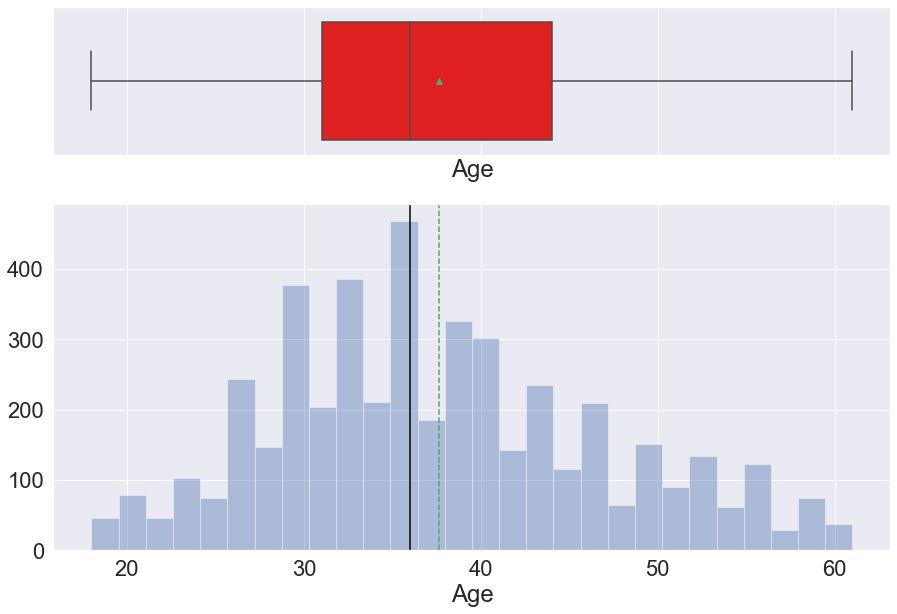

In [138]:
histogram_boxplot(data['Age'])

- Mean `Age` is about 47.
- The distribution of `Age` is a bit right skewed.

### Plot of `DurationOfPitch`


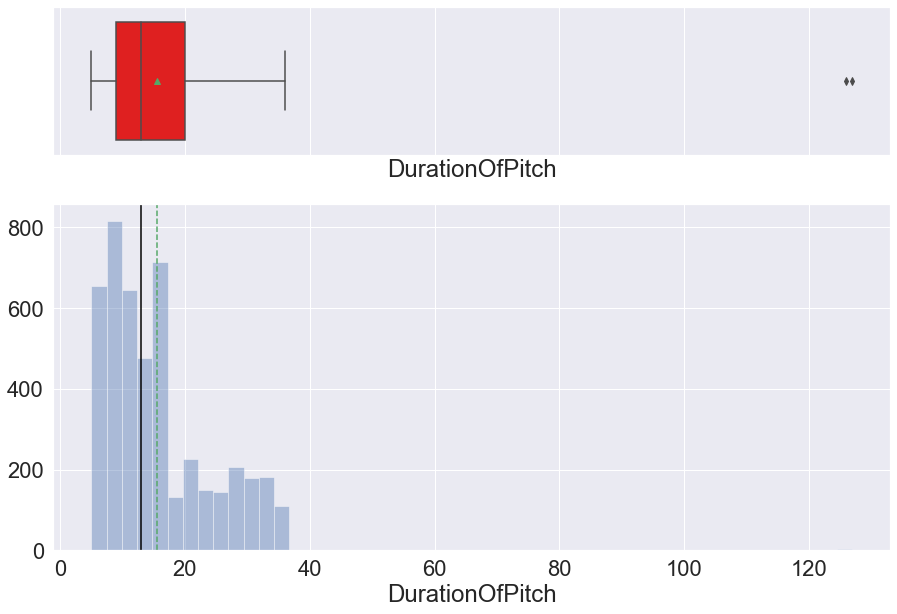

In [139]:
histogram_boxplot(data['DurationOfPitch'])

- Typical pitch duration was about 15 units of time.
-Distribution is right skewed.

### Plot of `NumberOfTrips`

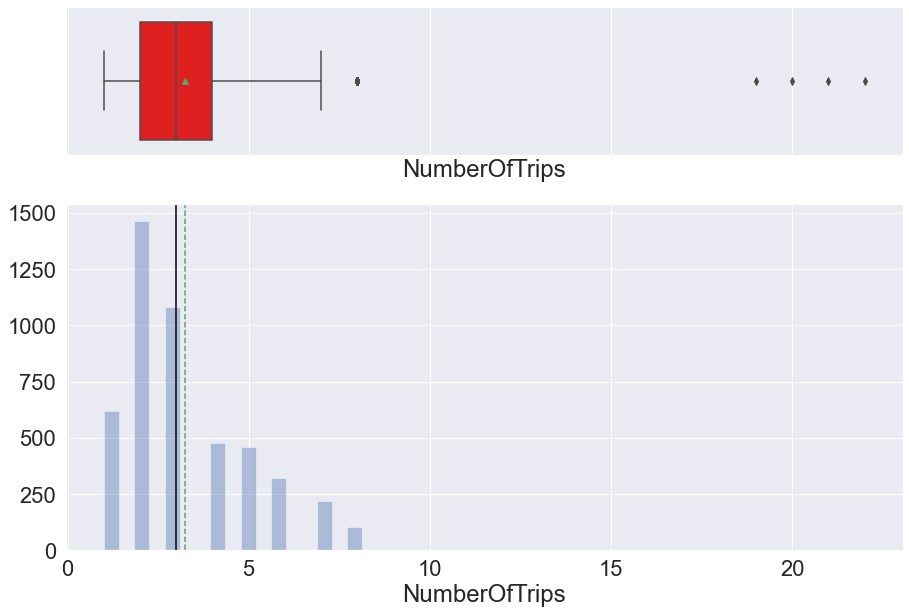

In [140]:
histogram_boxplot(data['NumberOfTrips'])

- Customers mostly had 2 trips in a year on average.
- The distribution is right skewed with extreme values.

### Plot of `MonthlyIncome`

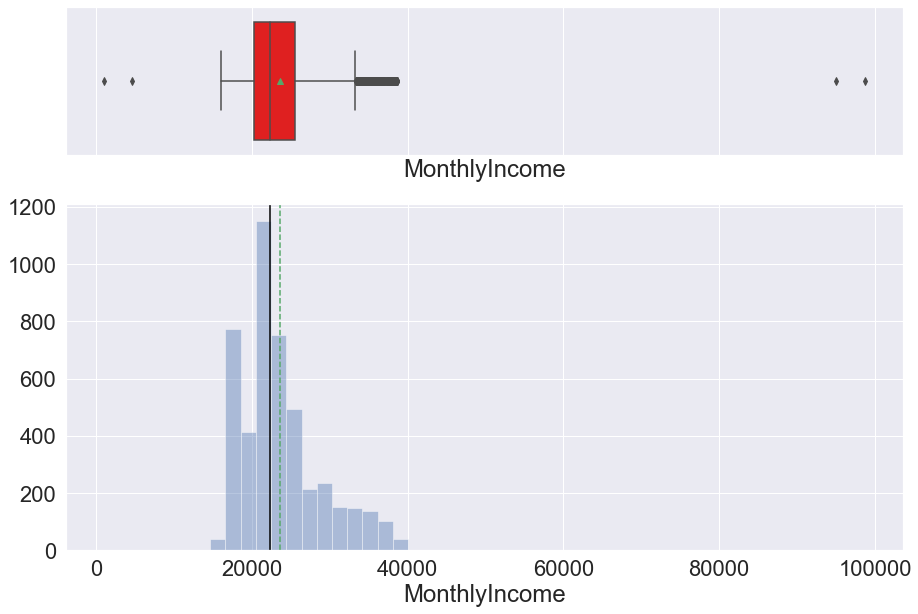

In [141]:
histogram_boxplot(data['MonthlyIncome'])

- Average monthly income is about 22000
-The distribution of income is right skewed.

In [142]:
## Function to plot class-coded columns

def bar_plot(var, hue=None, figsize=(8,7), ax=None):
    
    plt.figure(figsize=figsize)
    plots=sns.countplot(var, hue=hue)
    for item in plots.patches:
        percent = f'{item.get_height()} ({item.get_height()/len(var):.1%})'
        x = item.get_x() + item.get_width()/2
        y = item.get_height()
        plots.annotate(percent, (x, y), size=12, xytext=(0, 8), va = 'center', ha = 'center', textcoords = 'offset points')
    plt.show()

### Plot of `TypeofContact`

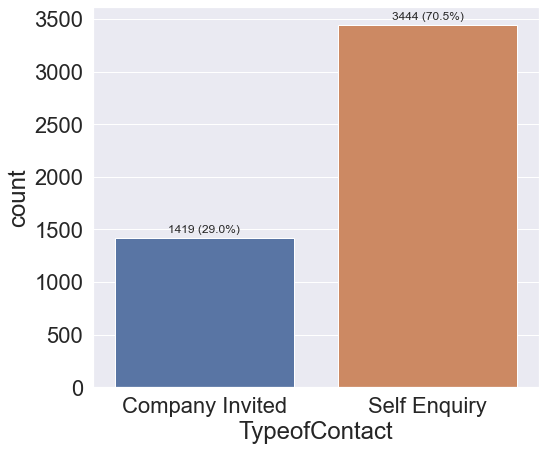

In [143]:
bar_plot(data['TypeofContact'])

More than 70% of customers came on their own.

### Plot of `CityTier`

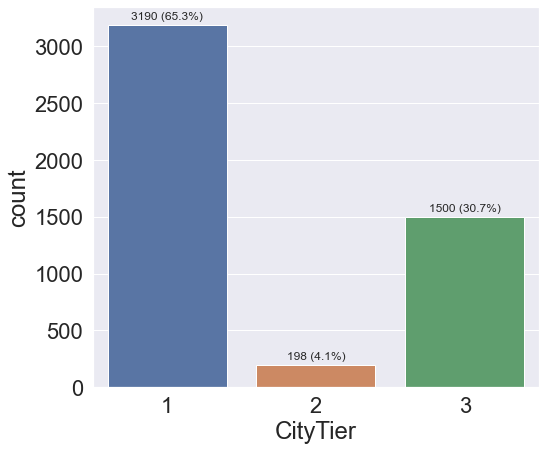

In [144]:
bar_plot(data['CityTier'])

The vast majority of customers came from the most developped cities.

### Plot of `Occupation`

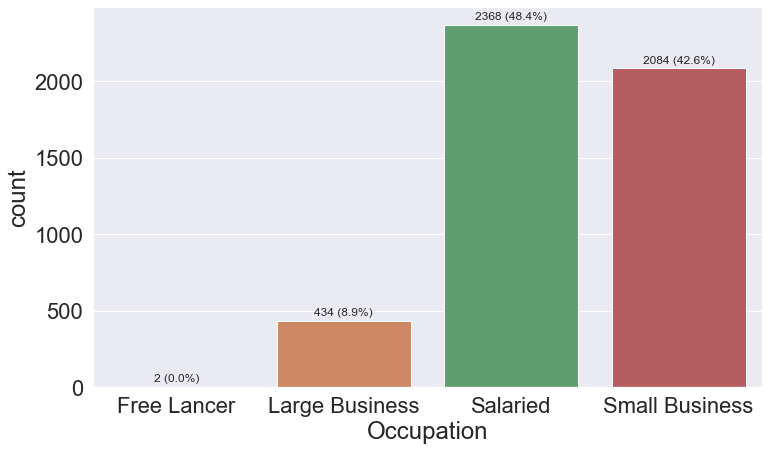

In [145]:
bar_plot(data['Occupation'], figsize=(12,7))

The majority of customers are salaried. Only two are free lancers.

### Plot of `Gender`

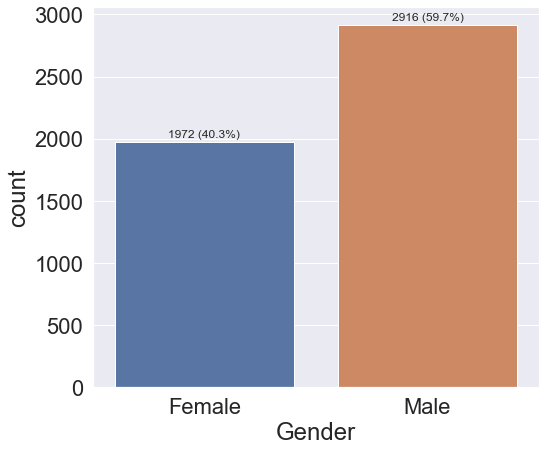

In [146]:
bar_plot(data['Gender'])

Almost 60% of customers are men

### Plot of `NumberOfPersonVisiting`

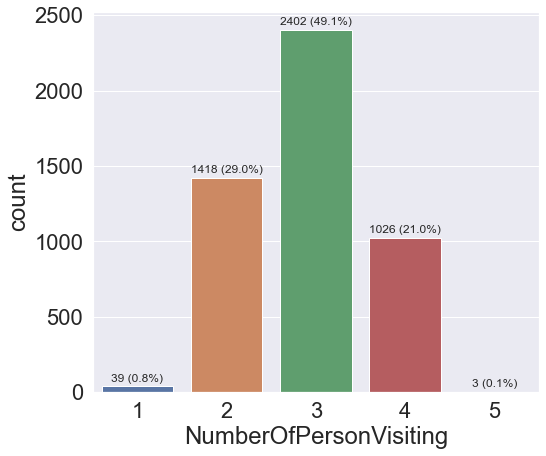

In [147]:
bar_plot(data['NumberOfPersonVisiting'])

More often, customers planned to take the trip with three people.

### Plot of ` NumberOfFollowups`

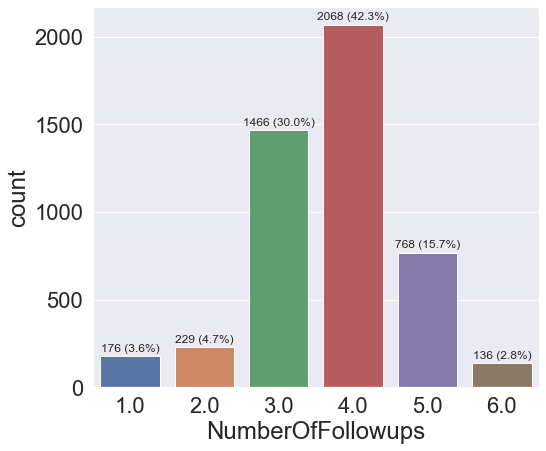

In [148]:
bar_plot(data['NumberOfFollowups'])

Sales most often made 4 follow-ups after the pitch

### Plot of `ProductPitched`

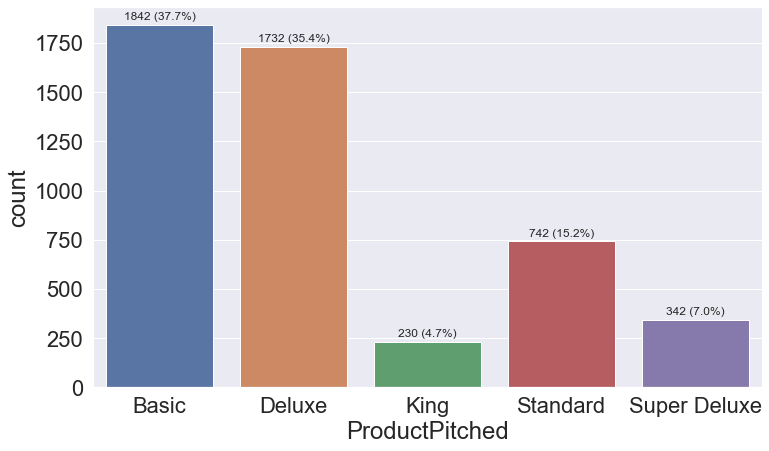

In [149]:
bar_plot(data['ProductPitched'], figsize=(12,7))

`Basic` and `Deluxe` are the most pitched products.

### Plot of `PreferredPropertyStar`

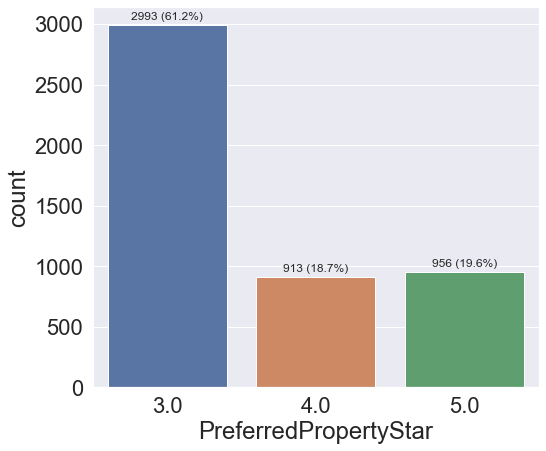

In [150]:
bar_plot(data['PreferredPropertyStar'])

Customers preferred hotels rated at least 3 stars, with the majority preferring 3 stars.

### Plot of `MaritalStatus`

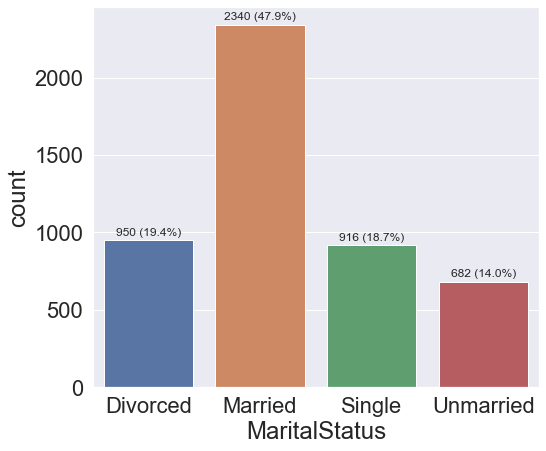

In [151]:
bar_plot(data['MaritalStatus'])

Customers were mostly married persons.

### Plot of `Passport`

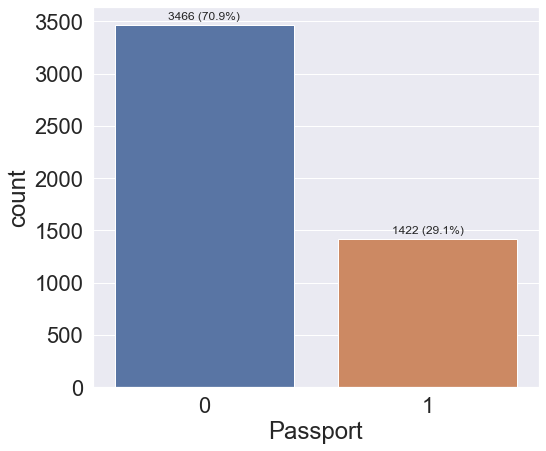

In [152]:
bar_plot(data['Passport'])

More than 70% of customers did not have a passport.

### Plot of `PitchSatisfactionScore`

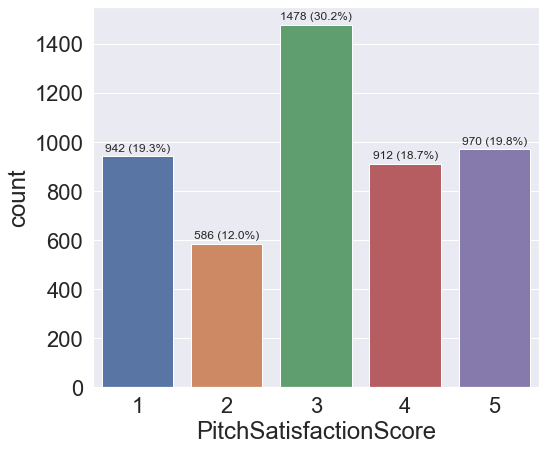

In [153]:
bar_plot(data['PitchSatisfactionScore'])

Majority of customers had a satisfaction of at least 3.  about the sales pitch.

### Plot of `Owncar`

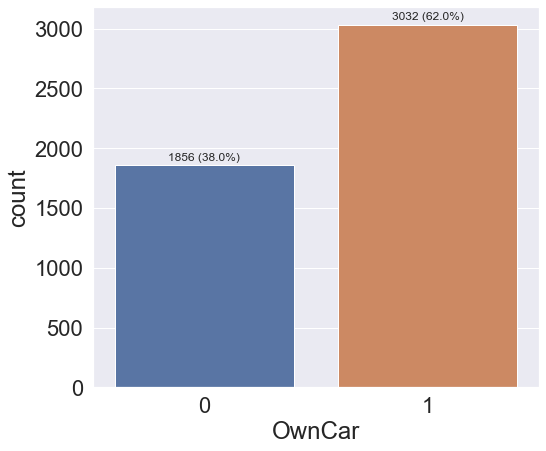

In [154]:
bar_plot(data['OwnCar'])

62% of customers owned a car

### Plot of `NumberOfChildrenVisiting`

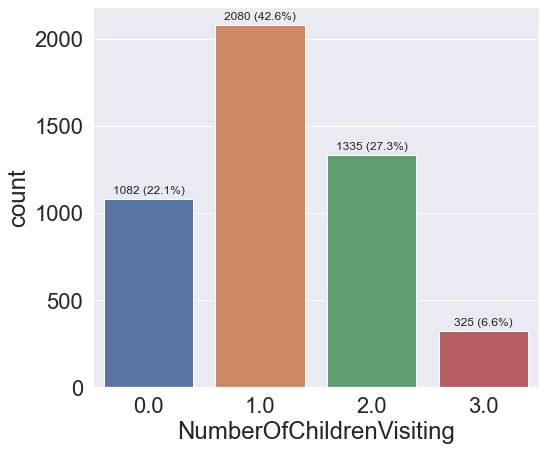

In [155]:
bar_plot(data['NumberOfChildrenVisiting'])

Customers largely had one kid under 5 to take on the trip.

### Plot of `Designation`

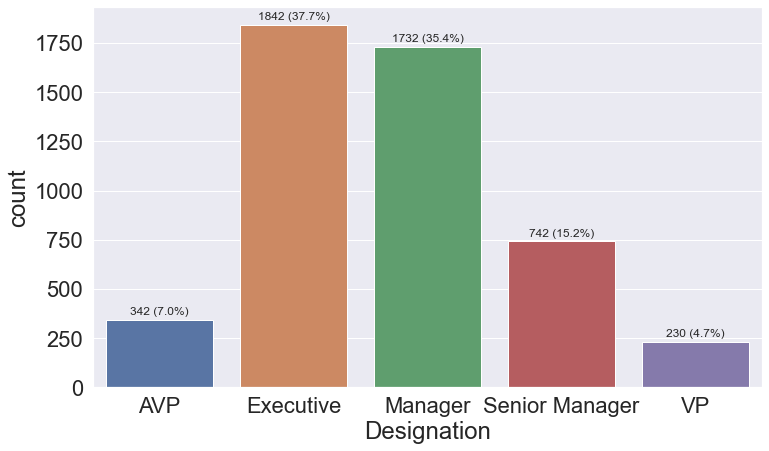

In [156]:
bar_plot(data['Designation'], figsize=(12,7))

Customers mostly had a position of Executive or Manager.

## b) Bivariate analysis

### Correlations between numerical variables

In [157]:
data.corr()

,CustomerID,Age,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,NumberOfTrips,MonthlyIncome
CustomerID,1.00000,0.03213,0.06430,0.60401,0.42754,0.22485,0.27683
Age,0.03213,1.00000,-0.01206,0.01162,-0.00258,0.18490,0.46487
DurationOfPitch,0.06430,-0.01206,1.00000,0.06514,0.00943,0.00972,-0.00625
NumberOfPersonVisiting,0.60401,0.01162,0.06514,1.00000,0.32857,0.19522,0.19513
NumberOfFollowups,0.42754,-0.00258,0.00943,0.32857,1.00000,0.13952,0.17650
NumberOfTrips,0.22485,0.18490,0.00972,0.19522,0.13952,1.00000,0.13910
MonthlyIncome,0.27683,0.46487,-0.00625,0.19513,0.17650,0.13910,1.00000


<AxesSubplot:>

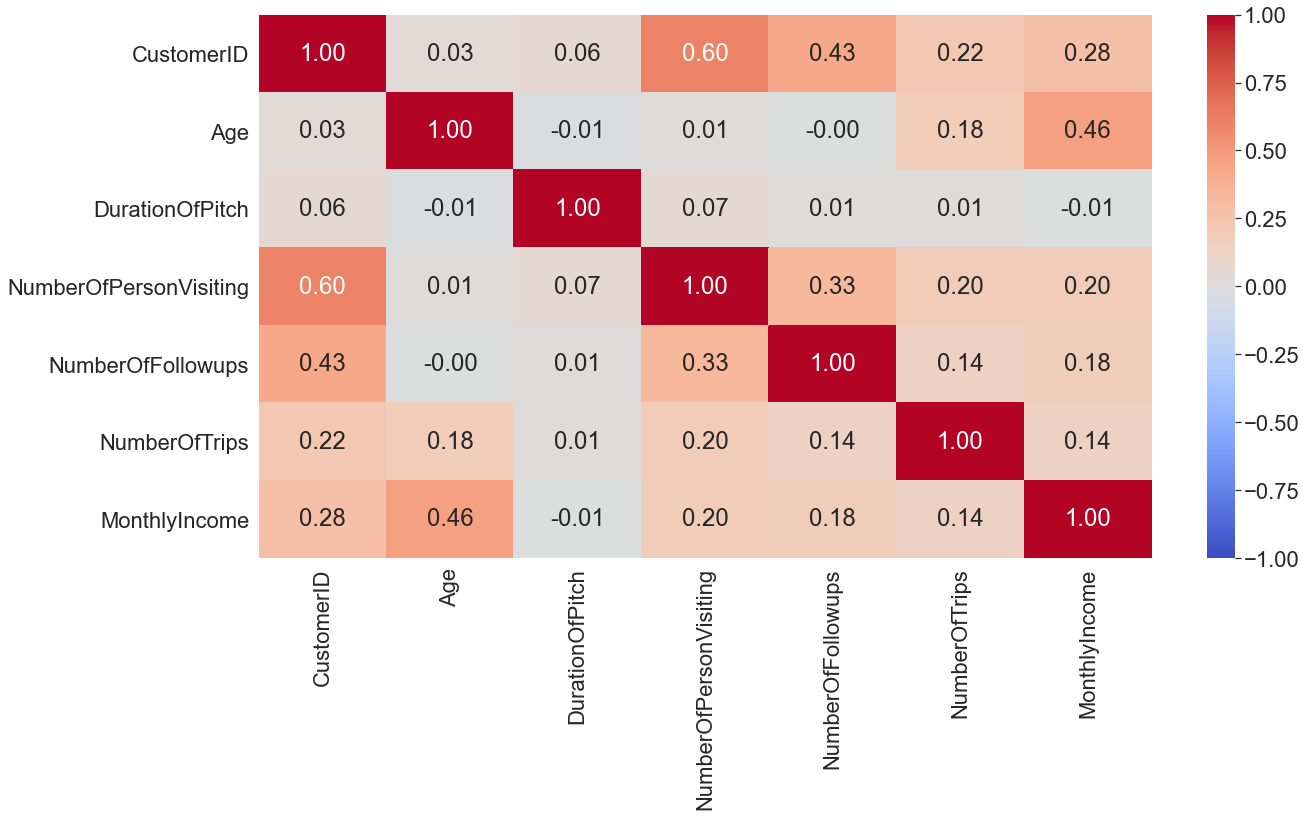

In [158]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), annot=True, cmap = 'coolwarm',vmin=-1,vmax=1,fmt='.2f')

**Observation:**
Almost all the coorealations are positive. Correlations are also weak, the highest being between `Age` and `Income`

### Pairplot of all variables

<Figure size 864x648 with 0 Axes>

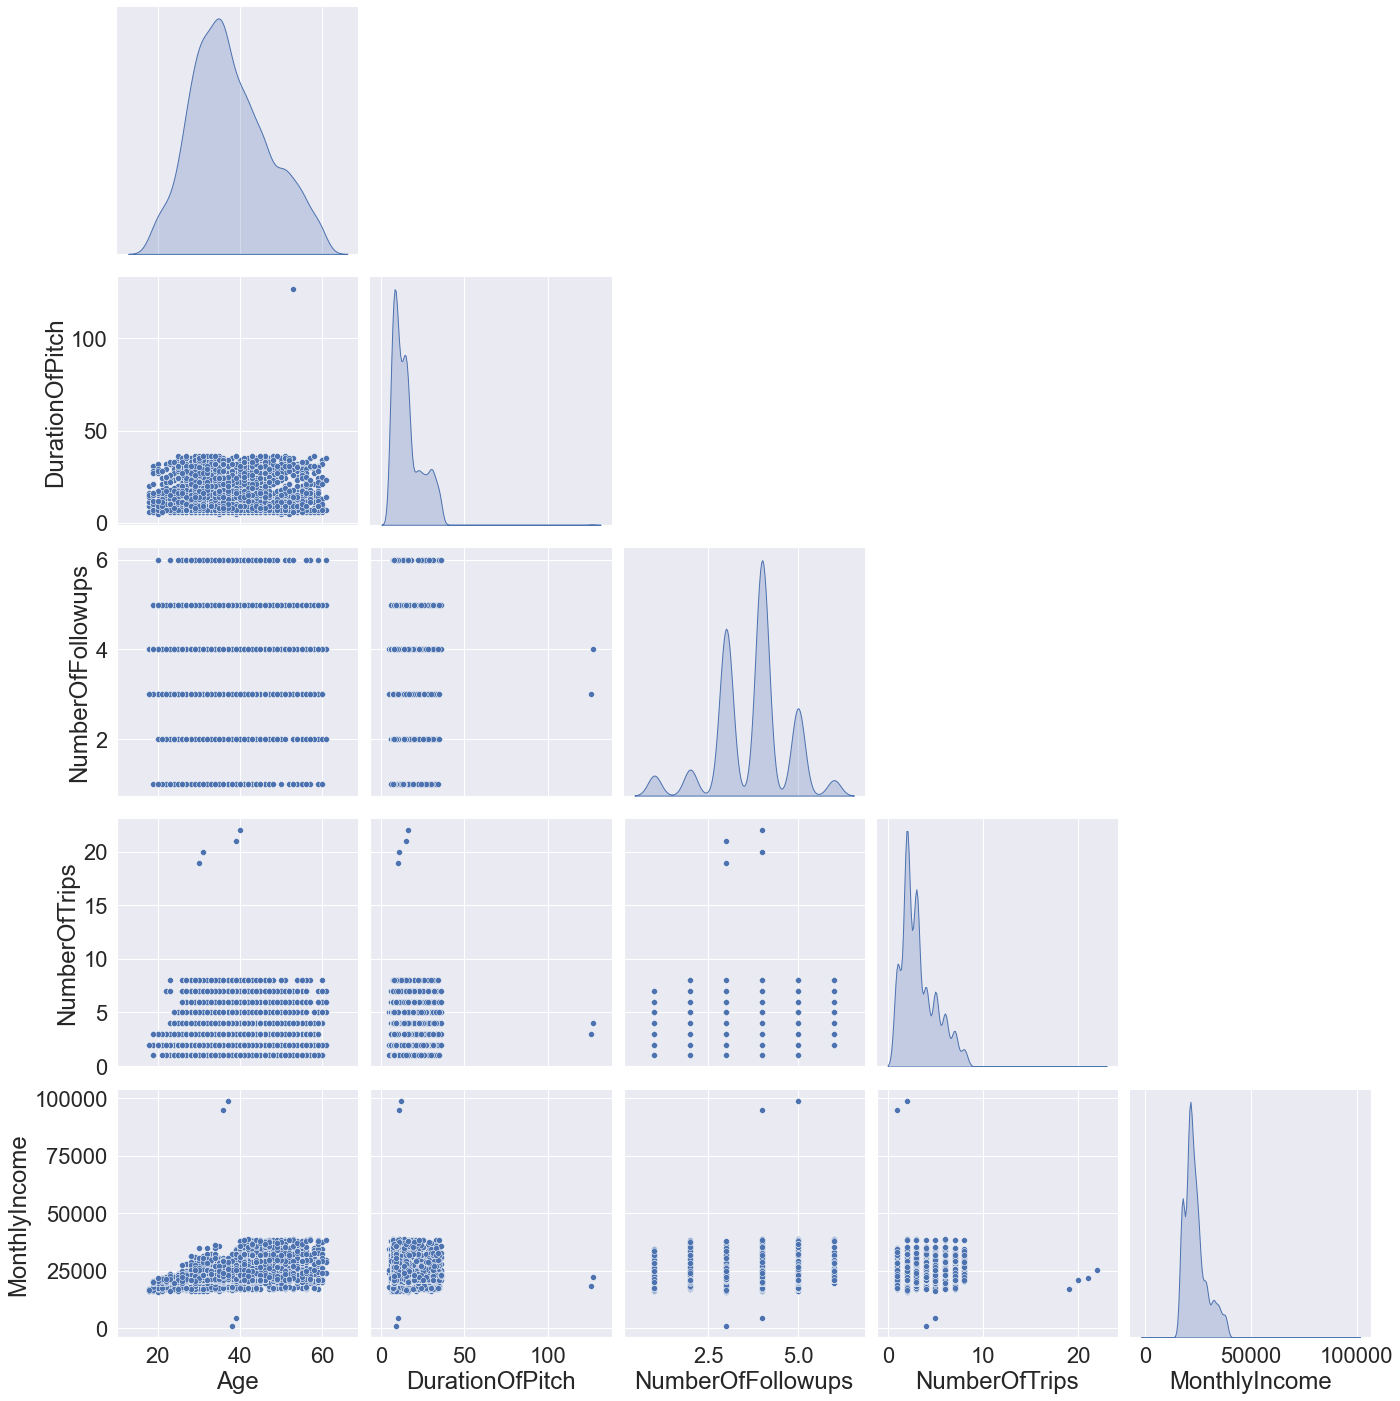

In [159]:
plt.figure(figsize=(12,9))
sns.pairplot(data.select_dtypes('float', 'int'), corner = True, diag_kind = 'kde', size = 4 )
plt.show()

### `ProdTaken` vs `Age`

<AxesSubplot:xlabel='ProdTaken', ylabel='Age'>

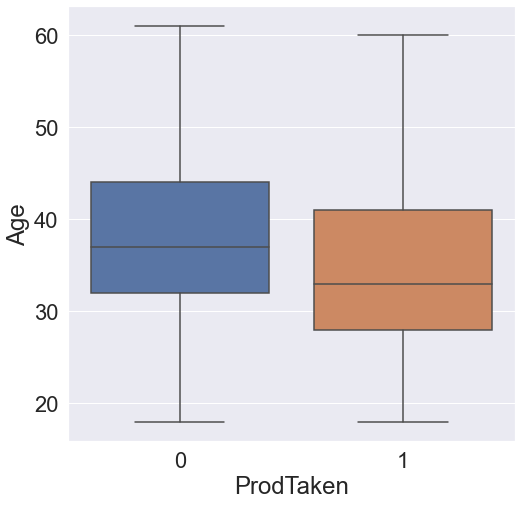

In [160]:
plt.figure(figsize=(8,8))
sns.boxplot(data=data, x='ProdTaken', y='Age')

Customers who purchased a product are on average younger than those who did not.

### `ProdTaken` vs `DurationOfPitch`

<AxesSubplot:xlabel='ProdTaken', ylabel='DurationOfPitch'>

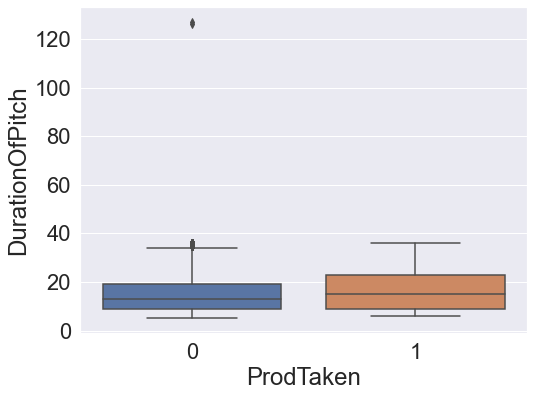

In [161]:
plt.figure(figsize=(8,6))
sns.boxplot(data=data, x='ProdTaken', y='DurationOfPitch')

Customers who purchased a product where pitched for longer period of time than those who did not.

### `ProdTaken` vs `NumberOfPersonVisiting`

<AxesSubplot:xlabel='ProdTaken', ylabel='NumberOfPersonVisiting'>

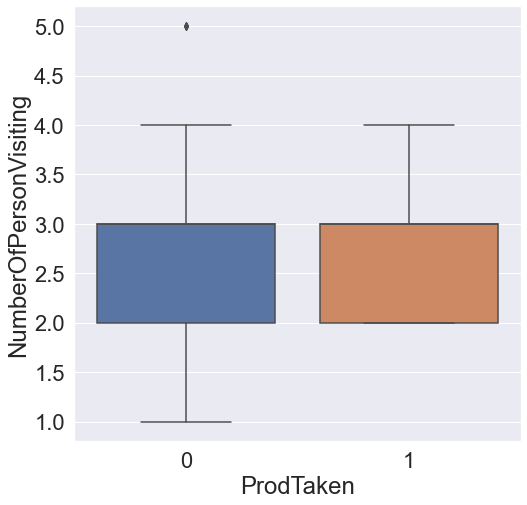

In [162]:
plt.figure(figsize=(8,8))
sns.boxplot(data=data, x='ProdTaken', y='NumberOfPersonVisiting')

Customers who purchased a product and those who did not, planned to take the same number of person.

### `ProdTaken` vs `NumberOfFollowups`

<AxesSubplot:xlabel='ProdTaken', ylabel='NumberOfFollowups'>

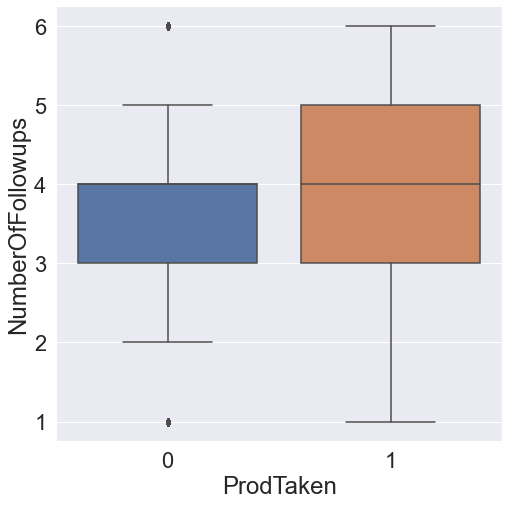

In [163]:
plt.figure(figsize=(8,8))
sns.boxplot(data=data, x='ProdTaken', y='NumberOfFollowups')

Customers who ended up purchasing a product are those with the higher number of followup.

### `ProdTaken` vs `NumberOfTrips`

<AxesSubplot:xlabel='ProdTaken', ylabel='NumberOfTrips'>

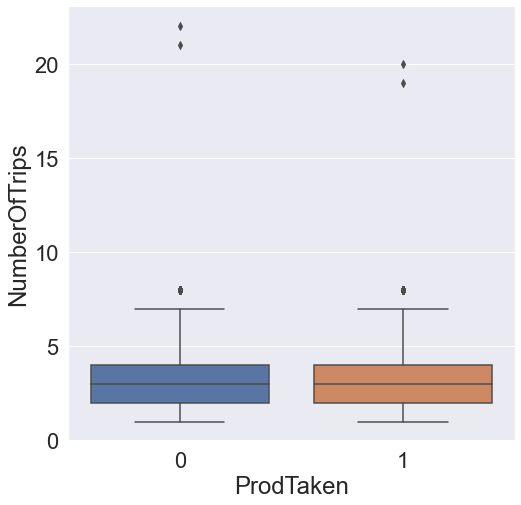

In [164]:
plt.figure(figsize=(8,8))
sns.boxplot(data=data, x='ProdTaken', y='NumberOfTrips')

Purchasing a product does not depend on the number of trips planned.

### `ProdTaken` vs `MonthlyIncome`

<AxesSubplot:xlabel='ProdTaken', ylabel='MonthlyIncome'>

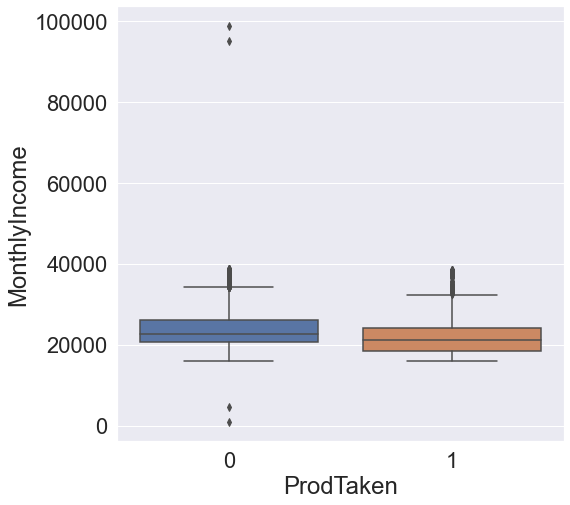

In [165]:
plt.figure(figsize=(8,8))
sns.boxplot(data=data, x='ProdTaken', y='MonthlyIncome')

Customers who purchased a product on average earn less than those who did not.

In [167]:
# A function to plot stacked bar charts for categorical columns
def stacked_plot(x):
    sns.set(palette='tab10')
    tab1 = pd.crosstab(x,data['ProdTaken'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,data['ProdTaken'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

### `ProdTaken` vs `TypeofContact`

ProdTaken           0    1   All
TypeofContact                   
Company Invited  1109  310  1419
Self Enquiry     2837  607  3444
All              3946  917  4863
------------------------------------------------------------------------------------------------------------------------


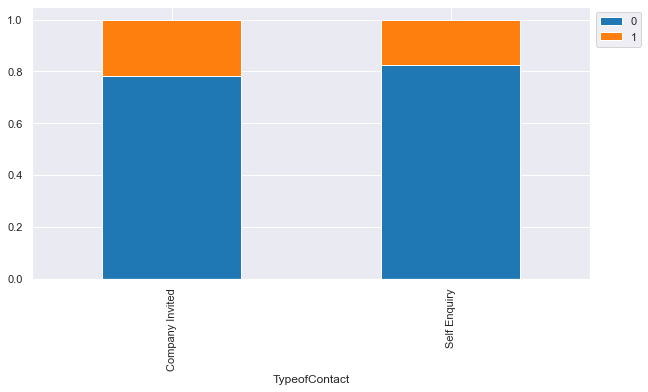

In [168]:
stacked_plot(data['TypeofContact'])

More contact invited by the company purchased a product than those who came by themselves.

### `ProdTaken` vs `CityTier`

ProdTaken     0    1   All
CityTier                  
1          2670  520  3190
2           152   46   198
3          1146  354  1500
All        3968  920  4888
------------------------------------------------------------------------------------------------------------------------


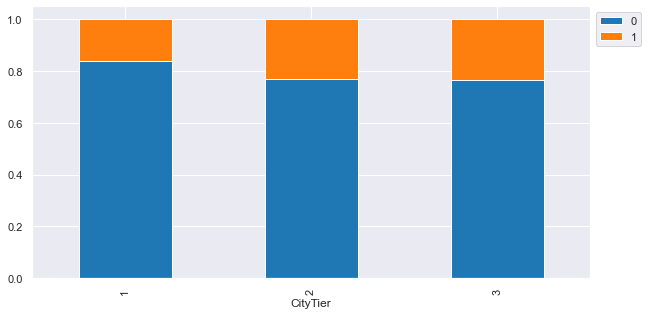

In [169]:
stacked_plot(data['CityTier'])

The more developped a city the less customers from there purchased a product from the tourism company.

### `ProdTaken` vs `Occupation`

ProdTaken          0    1   All
Occupation                     
Free Lancer        0    2     2
Large Business   314  120   434
Salaried        1954  414  2368
Small Business  1700  384  2084
All             3968  920  4888
------------------------------------------------------------------------------------------------------------------------


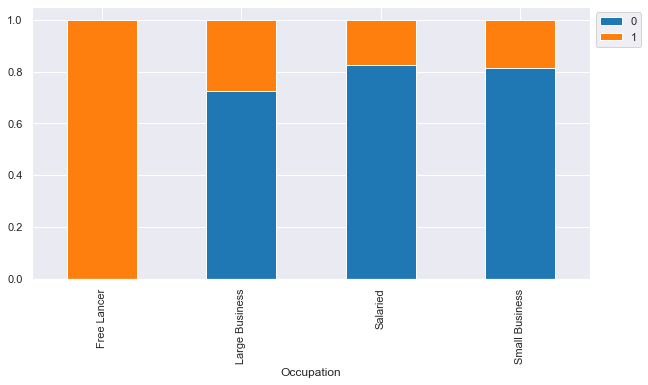

In [170]:
stacked_plot(data['Occupation'])

- All freelancers purchased a product.
- Higher proportion of people working in large businesses purchased than those working in small businesses or salaried

### `ProdTaken` vs `Gender`

ProdTaken     0    1   All
Gender                    
Female     1630  342  1972
Male       2338  578  2916
All        3968  920  4888
------------------------------------------------------------------------------------------------------------------------


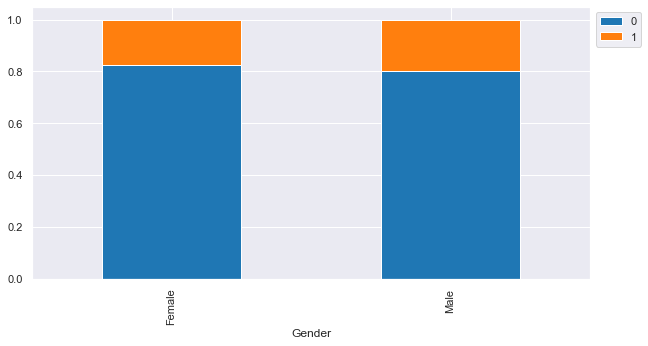

In [171]:
stacked_plot(data['Gender'])

A higher proportion of men boght a product compared to women.

### `ProdTaken` vs `ProductPitched`

ProdTaken          0    1   All
ProductPitched                 
Basic           1290  552  1842
Deluxe          1528  204  1732
King             210   20   230
Standard         618  124   742
Super Deluxe     322   20   342
All             3968  920  4888
------------------------------------------------------------------------------------------------------------------------


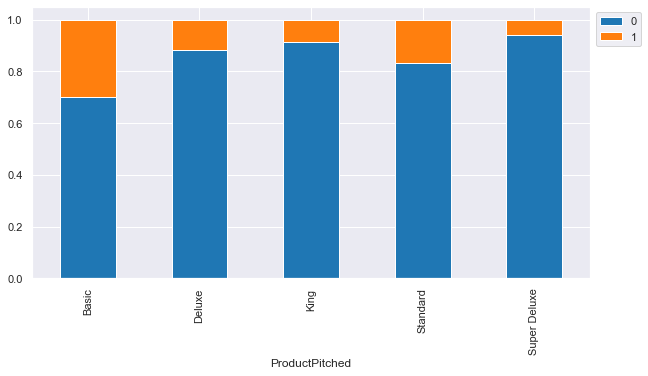

In [172]:
stacked_plot(data['ProductPitched'])

The higher the standard of the product, the less it was purchased.

### `ProdTaken` vs `PreferredPropertyStar`

ProdTaken                 0    1   All
PreferredPropertyStar                 
3.0                    2511  482  2993
4.0                     731  182   913
5.0                     706  250   956
All                    3948  914  4862
------------------------------------------------------------------------------------------------------------------------


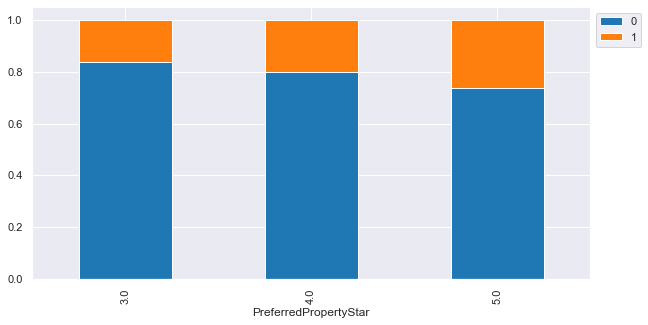

In [173]:
stacked_plot(data['PreferredPropertyStar'])

Customers who purchased a product mostly preferred the highest rated hotels.

### `ProdTaken` vs `MaritalStatus`

ProdTaken         0    1   All
MaritalStatus                 
Divorced        826  124   950
Married        2014  326  2340
Single          612  304   916
Unmarried       516  166   682
All            3968  920  4888
------------------------------------------------------------------------------------------------------------------------


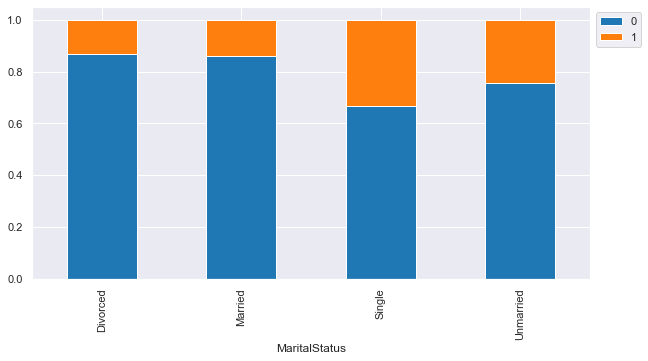

In [174]:
stacked_plot(data['MaritalStatus'])

 A higher proportion of single people purchased a product, followed by unmarried. Married and Divored purchased the less.

### `ProdTaken` vs `Passport`

ProdTaken     0    1   All
Passport                  
0          3040  426  3466
1           928  494  1422
All        3968  920  4888
------------------------------------------------------------------------------------------------------------------------


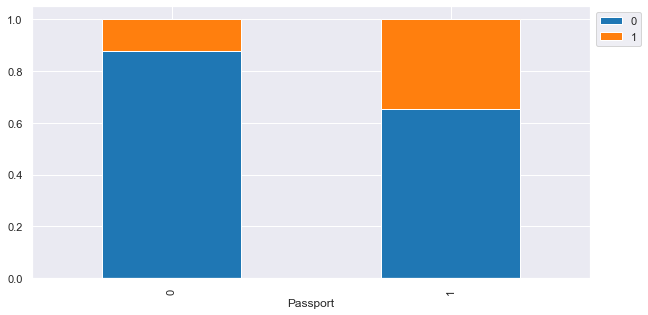

In [175]:
stacked_plot(data['Passport'])

More people with a passport purchased a product than those without. This is logic, for having a passport broadens one's possibilities in terms of tourism's choices.

### `ProdTaken` vs `PitchSatisfactionScore`

ProdTaken                  0    1   All
PitchSatisfactionScore                 
1                        798  144   942
2                        498   88   586
3                       1162  316  1478
4                        750  162   912
5                        760  210   970
All                     3968  920  4888
------------------------------------------------------------------------------------------------------------------------


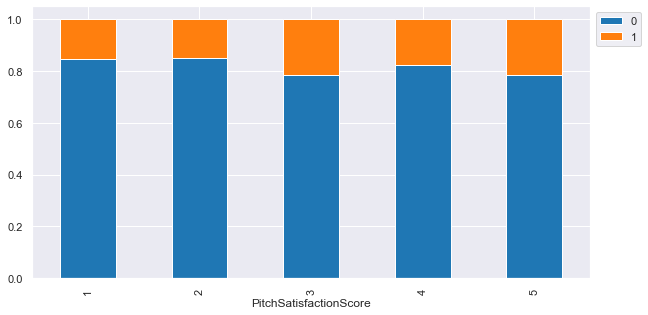

In [176]:
stacked_plot(data['PitchSatisfactionScore'])

The more satisfied the clients, the more products they purchased.

### `ProdTaken` vs `Owncar`

ProdTaken     0    1   All
OwnCar                    
0          1496  360  1856
1          2472  560  3032
All        3968  920  4888
------------------------------------------------------------------------------------------------------------------------


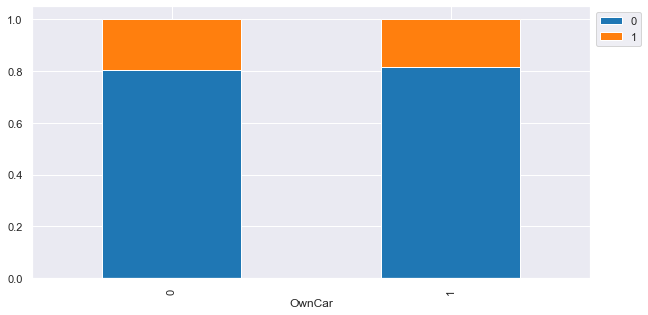

In [177]:
stacked_plot(data['OwnCar'])

Product purchasing does not depend on whether or not the customer owns a car.

### `ProdTaken` vs `NumberOfChildrenVisiting`

ProdTaken                    0    1   All
NumberOfChildrenVisiting                 
0.0                        880  202  1082
1.0                       1688  392  2080
2.0                       1082  253  1335
3.0                        259   66   325
All                       3909  913  4822
------------------------------------------------------------------------------------------------------------------------


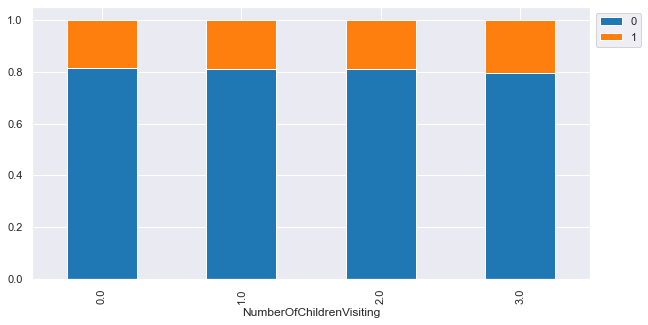

In [178]:
stacked_plot(data['NumberOfChildrenVisiting'])

Product purchasing is independent of the number of children under 5 the customer projected to take.

### `ProdTaken` vs `Designation`

ProdTaken          0    1   All
Designation                    
AVP              322   20   342
Executive       1290  552  1842
Manager         1528  204  1732
Senior Manager   618  124   742
VP               210   20   230
All             3968  920  4888
------------------------------------------------------------------------------------------------------------------------


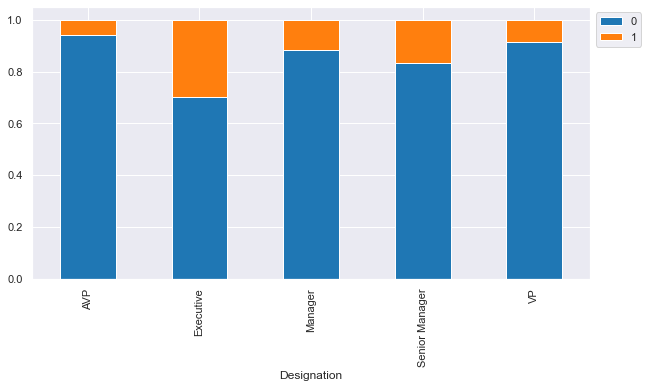

In [179]:
stacked_plot(data['Designation'])

Customers at the level of Executive in their company purchased the more, followed by Senior Managers

## <a name = 'link22'>2.2 Data processing</a>

## a) Outliers Treatment

In [304]:
# Let's treat outliers by flooring and capping
def treat_outliers(df, col):
    """
    treats outliers in a variable
    col: str, name of the numerical variable
    df: bankframe
    col: name of the column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    treat outlier in all numerical variables
    col_list: list of numerical variables
    df: bank frame
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

In [305]:
data = treat_outliers_all(data, ['MonthlyIncome', 'NumberOfTrips', 'DurationOfPitch'])

**Note:**

We choose to treat outliers for the reason that, outliers can hurt some Ensemble learning methods as Gradient Boosting. In fact, as subsequent learners in Gradient Boosting predict the residus of the former one, outliers can make those high, making prediction harder.

## b) Missing values Treatment

In [306]:
# Before any further treatment on the data, let make a copy

data_copy = data.copy()

In [307]:
# Checking misssing values
data.isna().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

**Notes**
- Missing `Age` will be replaced by the median of age by `Designation`. We go from the idea that, to reach acertain level of responsability, it takes some time of experience. We are aware that there are disparities depending of companies and individual.
- For missing `MonthlyIncome`, we will proceed the same way as for `Age`.
- Missing `DurationOfPitch`, `NumberOfTrips`, `NumberOfFollowups` will be imputed the median of the column.
- For categorical variables `TypeofContact`, `PreferredPropertyStar` and `NumberOfChildrenVisiting` we will create another category `unknown`.

In [308]:
data['DurationOfPitch'].fillna(value=data['DurationOfPitch'].median(), inplace = True)
data['NumberOfTrips'].fillna(value=data['NumberOfTrips'].median(), inplace = True)
data['NumberOfFollowups'].fillna(value=data['NumberOfFollowups'].median(), inplace = True)

In [309]:
impute = {
    'TypeofContact': {np.nan:'Unknown'},
    'PreferredPropertyStar': {np.nan:'Unknown'},
    'NumberOfChildrenVisiting': {np.nan:'Unknown'}
}

data.replace(impute, inplace=True)

In [310]:
def fill_na(df, col, ref):
    
    index = df[df[col].isna()].index
    for idx in index:
        rf = df.loc[idx, ref]
        df.loc[idx, col] = df[df[ref] == rf][col].mean()
        
    return df

#############################################################
            
def multiple_fill_na(df, cols, ref):
    for col in cols:
        df = fill_na(df, col, ref)
        
    return df

In [311]:
data = multiple_fill_na(data, ['Age', 'MonthlyIncome'], 'Designation')

In [312]:
data.isna().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

The dataset no longer has missing values.

## c) Features engineering

In [313]:
# Let's drop CustomerID column for it is of no importance

data.drop(columns=['CustomerID'], inplace = True)

In [314]:
# OneHot Encoding some actegorical variables
data = pd.get_dummies(data, columns=['TypeofContact', 'PreferredPropertyStar','PitchSatisfactionScore','Occupation','NumberOfChildrenVisiting' ,'Gender', 'ProductPitched',
                                     'MaritalStatus', 'Designation', 'CityTier', 'Passport', 'OwnCar'], drop_first = True)

# <a name = 'link3'>3. Modeling</a>

## <a name = 'link31'>3.1 Preliminaries</a>

### Model perfomance metrics

Since the company is concerned about targetting potential product buyers, the model should accurately predict them. That is, the model should label the maximum of potential buyers as such. So `recall` is the most important measure here. Of course, minimising the error of wrongly labelling as potential product buyer someone who is not will help the company in their business prediction, thus we will be taking a look at `precision score` as well as the overall `accuracy`.

The functions defined below will be used for model scores and confusion matrix construction.

In [315]:
def get_metrics_score(model,train,test,train_y,test_y,flag=True,roc=False):
    '''
    Function to calculate different metric scores of the model - Accuracy, Recall, Precision, and F1 score
    model: classifier to predict values of X
    train, test: Independent features
    train_y,test_y: Dependent variable
    flag: If the flag is set to True then only the print statements shwoing different will be displayed. 
    The default value is set to True.
    roc: If the roc is set to True then only roc score will be displayed. The default value is set to False.
    '''
    # defining an empty list to store train and test results
    
    score_list=[] 
    
    pred_train = model.predict(train)
    pred_test = model.predict(test)
    
    train_acc = accuracy_score(pred_train,train_y)
    test_acc = accuracy_score(pred_test,test_y)
    
    train_recall = recall_score(train_y,pred_train)
    test_recall = recall_score(test_y,pred_test)
    
    train_precision = precision_score(train_y,pred_train)
    test_precision = precision_score(test_y,pred_test)
    
    train_f1 = f1_score(train_y,pred_train)
    test_f1 = f1_score(test_y,pred_test)
    
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1))
        
     # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",round(accuracy_score(pred_train,train_y), 3))
        print("Accuracy on test set : ",round(accuracy_score(pred_test,test_y), 3))
        print("Recall on training set : ",round(recall_score(train_y,pred_train), 3))
        print("Recall on test set : ",round(recall_score(test_y,pred_test), 3))
        print("Precision on training set : ",round(precision_score(train_y,pred_train), 3))
        print("Precision on test set : ",round(precision_score(test_y,pred_test), 3))
        print("F1 on training set : ",round(f1_score(train_y,pred_train), 3))
        print("F1 on test set : ",round(f1_score(test_y,pred_test), 3))
        
    if roc == True:
        print("ROC-AUC Score on training set : ",round(roc_auc_score(train_y,pred_train), 3))
        print("ROC-AUC Score on test set : ",round(roc_auc_score(test_y,pred_test), 3))
    
    return score_list # returning the list with train and test scores

In [316]:
def get_metrics_score2(model,train,test,train_y,test_y,flag=True,roc=False):
    '''
    Function to calculate different metric scores of the model - Accuracy, Recall, Precision, and F1 score
    model: classifier to predict values of X
    train, test: Independent features
    train_y,test_y: Dependent variable
    flag: If the flag is set to True then only the print statements shwoing different will be displayed. 
    The default value is set to True.
    roc: If the roc is set to True then only roc score will be displayed. The default value is set to False.
    '''
    # defining an empty list to store train and test results
    
    score_list=[] 
    
    pred_train = model.predict(train)
    pred_test = model.predict(test)
    
    train_acc = accuracy_score(pred_train,train_y)
    test_acc = accuracy_score(pred_test,test_y)
    
    train_recall = recall_score(train_y,pred_train)
    test_recall = recall_score(test_y,pred_test)
    
    train_precision = precision_score(train_y,pred_train)
    test_precision = precision_score(test_y,pred_test)
    
    train_f1 = f1_score(train_y,pred_train)
    test_f1 = f1_score(test_y,pred_test)
    
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1))
        
    
    return score_list # returning the list with train and test scores

In [317]:
## Function to create confusion matrix
def make_confusion_matrix(model,test_X, y_actual, labels=[0, 1], color=None, threshold = None):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    if threshold:
        y_predict = model.predict(test_X)>threshold
    else:
        y_predict = model.predict(test_X)
    cm=metrics.confusion_matrix(y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,8))
    sns.heatmap(df_cm, annot=labels,fmt='', cmap = color)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Data preparation for modeling

In [318]:
y = data[['ProdTaken']]
X = data.drop(columns=['ProdTaken'])

X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 1)

## <a name = 'link32'>3.2 Model building  - Bagging</a>

### <a name = 'link321'>3.2.1 Decision Tree</a>

### i) Model fitting

In [319]:
modelTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
modelTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

### Metric scores

In [320]:
dTree_scores = get_metrics_score(modelTree, X_train, X_test, y_train, y_test)

Accuracy on training set :  1.0
Accuracy on test set :  0.903
Recall on training set :  1.0
Recall on test set :  0.739
Precision on training set :  1.0
Precision on test set :  0.745
F1 on training set :  1.0
F1 on test set :  0.742


Decision Tree does a fairly good job but it is overfitting.

### Confusion matrix

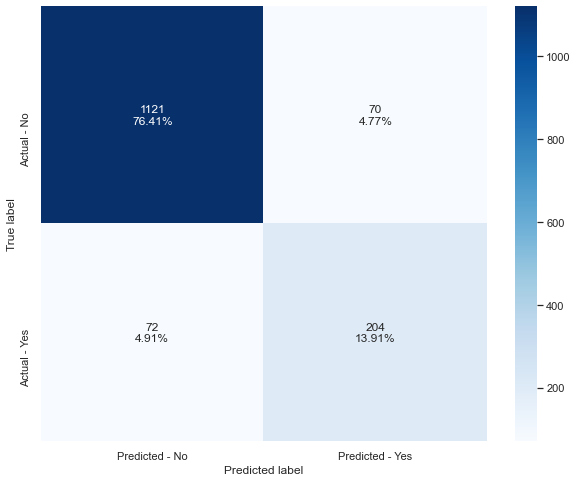

In [445]:
make_confusion_matrix(modelTree, X_test, y_test, color='Blues')

### Tree Visualization

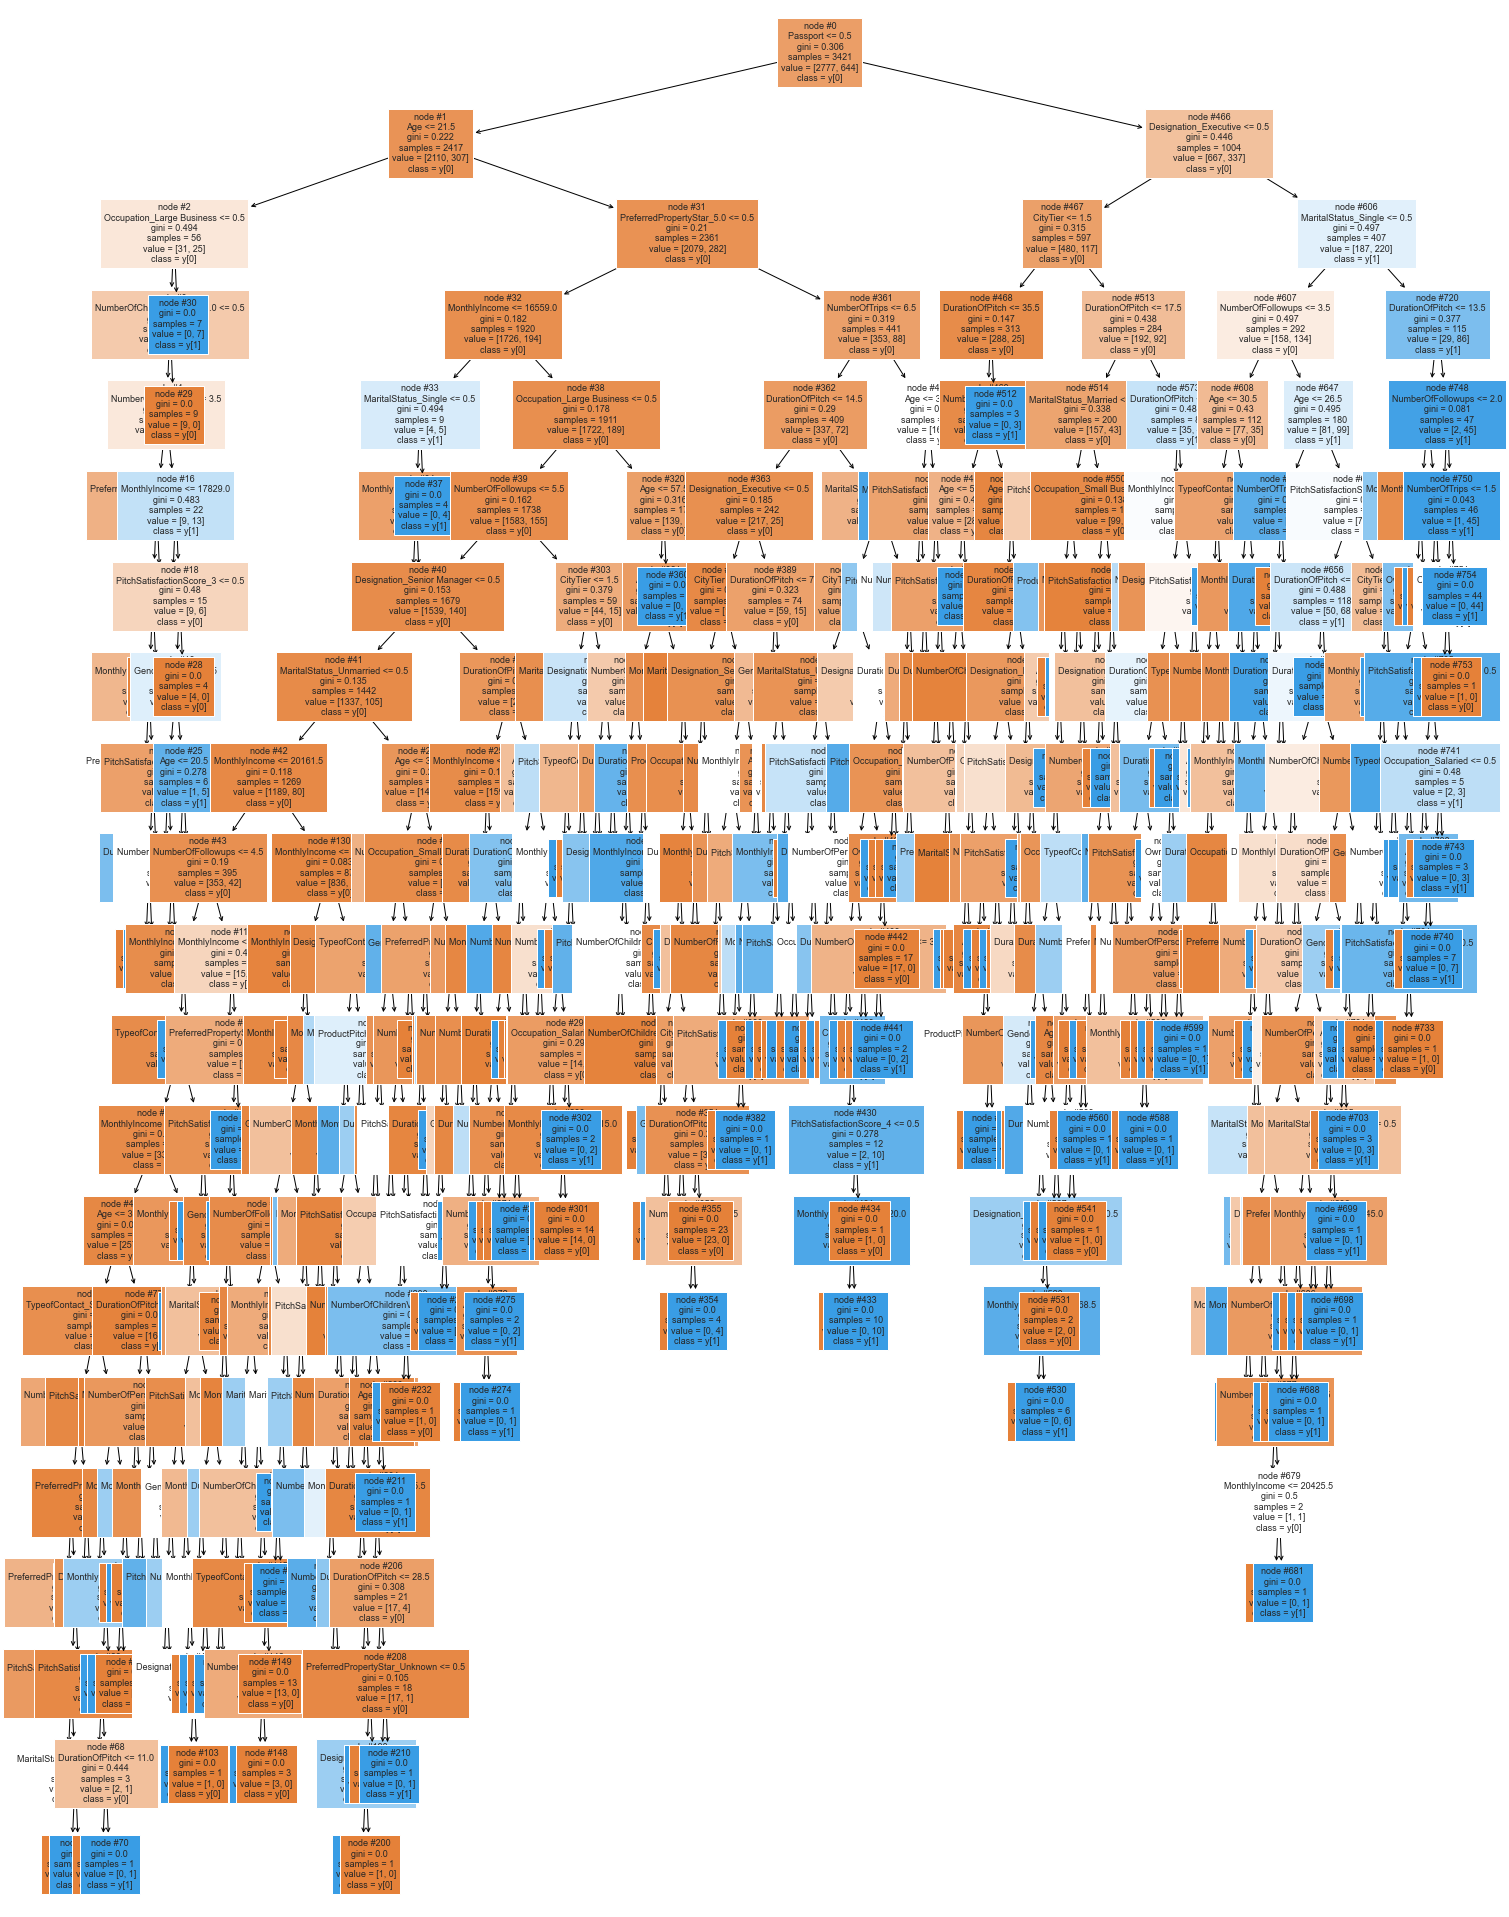

In [197]:
plt.figure(figsize=(25,35))
plot = tree.plot_tree(modelTree,feature_names=list(X_train.columns),filled=True,fontsize=9,node_ids=True,class_names=True,)
#below code will add arrows to the decision tree split if they are missing
for o in plot:
     arrow = o.arrow_patch
     if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

### Importance of features in the Tree building

In [323]:
# Importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(modelTree.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', 
                                                                                                        ascending = False))

                                     Imp
Age                              0.15976
DurationOfPitch                  0.14037
MonthlyIncome                    0.12040
NumberOfTrips                    0.06945
Designation_Executive            0.06298
Passport_1                       0.05907
NumberOfFollowups                0.05415
CityTier_3                       0.03717
MaritalStatus_Single             0.03312
PitchSatisfactionScore_4         0.02170
PreferredPropertyStar_4.0        0.02059
Gender_Female                    0.01802
NumberOfPersonVisiting           0.01708
Gender_Male                      0.01627
Occupation_Salaried              0.01603
TypeofContact_Self Enquiry       0.01598
PitchSatisfactionScore_3         0.01593
PreferredPropertyStar_5.0        0.01322
OwnCar_1                         0.01298
Occupation_Large Business        0.01165
MaritalStatus_Married            0.01161
Occupation_Small Business        0.00764
CityTier_2                       0.00707
MaritalStatus_Un

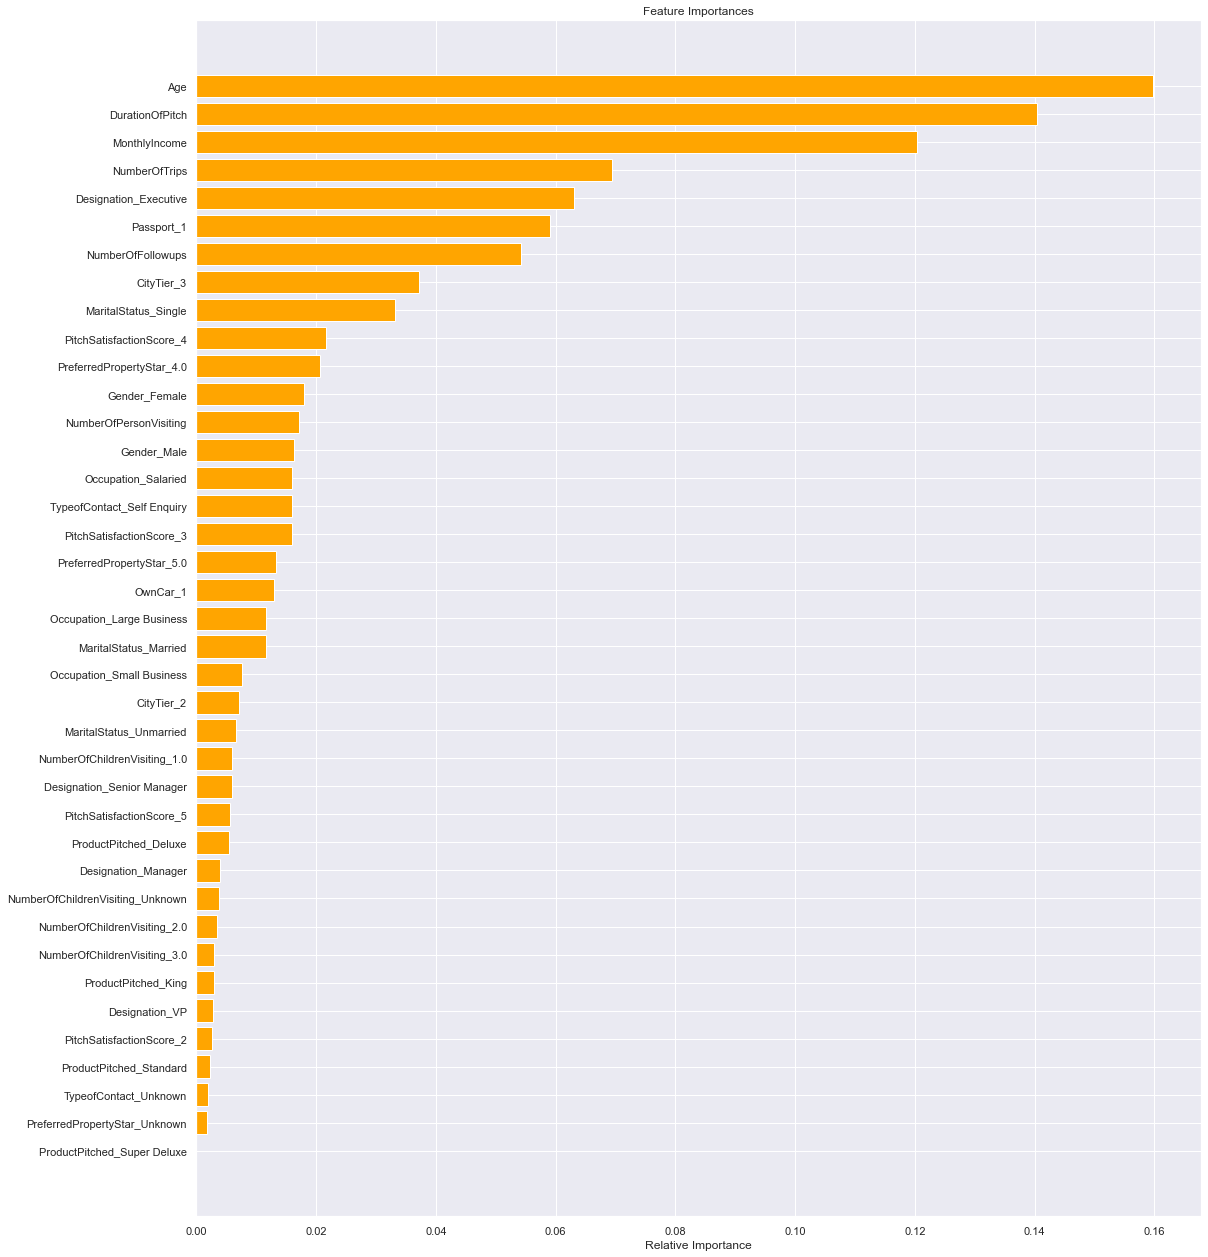

In [322]:
importances = modelTree.feature_importances_
indices = np.argsort(importances)
feature_names = list(X_train.columns)

plt.figure(figsize=(18,22))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='orange', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Many features have a say in the Tree building. However, few are of high importance.The most important ones are : `Age`, `DurationOfPitch`, `MonthlyIncome`, `Designation`, `NumberOfTrips` and `Passport`

### ii) Pre-pruning Tree

In [324]:
modelTree1 = DecisionTreeClassifier(criterion = 'gini',max_depth=3,random_state=1)
modelTree1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

In [325]:
dTree1_scores = get_metrics_score(modelTree1, X_train, X_test, y_train, y_test)

Accuracy on training set :  0.83
Accuracy on test set :  0.831
Recall on training set :  0.144
Recall on test set :  0.141
Precision on training set :  0.762
Precision on test set :  0.78
F1 on training set :  0.243
F1 on test set :  0.239


Pre-pruning does a horrible job in terms of `Recall score` and `F1 score`.

### iii) Decision Tree: Hyperparameters tuning

In [326]:
# Choose the type of classifier. 
modelTree2 = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {'max_depth': np.arange(1,10), 
              'min_samples_leaf': [1, 2, 5, 7, 10,15,20],
              'max_leaf_nodes' : [2, 3, 5, 10],
              'min_impurity_decrease': [0.01,0.1,1]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(modelTree2, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
modelTree2 = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
modelTree2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, max_leaf_nodes=3,
                       min_impurity_decrease=0.01, random_state=1)

In [327]:
dTree2_scores = get_metrics_score(modelTree2, X_train, X_test, y_train, y_test)

Accuracy on training set :  0.821
Accuracy on test set :  0.841
Recall on training set :  0.342
Recall on test set :  0.37
Precision on training set :  0.541
Precision on test set :  0.634
F1 on training set :  0.419
F1 on test set :  0.467


GridSearch neither does not improve the model.

### iv) Cost-complexity pruning

In [328]:
# First, we train the ful tree and retreive all the possible cost complexity parameters.

clas = DecisionTreeClassifier(random_state=1)
path = clas.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

In [329]:
# Let's train all the models using the above retreived cost-complexity parameters. We keep the trained modeels in the clfs list.

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

In [330]:
# Let's save the recall scores on training data for each of the models above.

recall_train=[]
for clf in clfs:
    pred_train=clf.predict(X_train)
    values_train=metrics.recall_score(y_train,pred_train)
    recall_train.append(values_train)

In [331]:
# Saving the recall scores o testing data as well.
recall_test=[]
for clf in clfs:
    pred_test=clf.predict(X_test)
    values_test=metrics.recall_score(y_test,pred_test)
    recall_test.append(values_test)

In [332]:
# Getting the optimal cost-complexity parameter

index_optimal_ccp = np.argmax(recall_test)
optimal_ccp_alpha = ccp_alphas[index_optimal_ccp]
optimal_ccp_alpha

0.0

In [333]:
# Retreiving the model where we get highest train and test recall

modelTree3 = clfs[index_optimal_ccp]

In [334]:
dTree3_scores = get_metrics_score(modelTree3, X_train, X_test, y_train, y_test)

Accuracy on training set :  1.0
Accuracy on test set :  0.903
Recall on training set :  1.0
Recall on test set :  0.739
Precision on training set :  1.0
Precision on test set :  0.745
F1 on training set :  1.0
F1 on test set :  0.742


Cost-complexity pruning brings us back to the original fully grown tree.

### <a name = 'link322'> 3.2.2 Bagging Classifier</a>

### i) Default Model

In [336]:
# Fitting the model
bagging = BaggingClassifier(random_state=1)
bagging.fit(X_train,y_train)

BaggingClassifier(random_state=1)

In [337]:
# Getting the metric scores
bagging_scores = get_metrics_score(bagging, X_train, X_test, y_train, y_test)

Accuracy on training set :  0.994
Accuracy on test set :  0.911
Recall on training set :  0.969
Recall on test set :  0.62
Precision on training set :  0.998
Precision on test set :  0.872
F1 on training set :  0.983
F1 on test set :  0.725


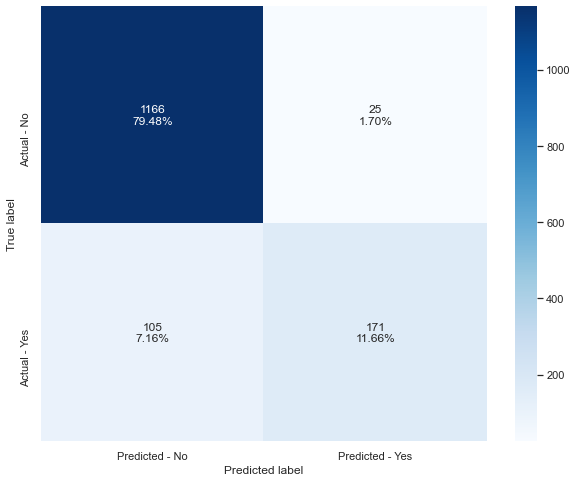

In [338]:
# Confusion matrix
make_confusion_matrix(bagging, X_test, y_test, color='Blues')

The default Bagging model does less than Decision tree in `recall`, but better in `accuracy` and `precision`, and as a plus, it does not overfit as much as Decision Tree.

### ii) Bagging with weighted Decision Trees

In [339]:
bagging_wt = BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='gini',class_weight={0:0.19,1:0.81},
                                                                     random_state=1),random_state=1)
bagging_wt.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.19,
                                                                      1: 0.81},
                                                        random_state=1),
                  random_state=1)

In [340]:
# Getting the metric scores
bagging_wt_scores = get_metrics_score(bagging_wt, X_train, X_test, y_train, y_test)

Accuracy on training set :  0.994
Accuracy on test set :  0.903
Recall on training set :  0.972
Recall on test set :  0.576
Precision on training set :  0.998
Precision on test set :  0.864
F1 on training set :  0.985
F1 on test set :  0.691


Weighting the decision trees did not improve our bagging model.

### iii) Bagging: Hyperparameters tuning

In [341]:
# grid search for bagging classifier
clf = DecisionTreeClassifier(class_weight={0:0.19,1:0.81},random_state=1)
param_grid = {'base_estimator':[clf],
              'n_estimators':[15,25,40,70,100,150],
              'max_features': [0.5, 0.6,0.7,0.8,0.9,1]
             }

grid = GridSearchCV(BaggingClassifier(random_state=1,bootstrap=True), param_grid=param_grid, scoring = 'recall', cv = 10)
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=BaggingClassifier(random_state=1),
             param_grid={'base_estimator': [DecisionTreeClassifier(class_weight={0: 0.19,
                                                                                 1: 0.81},
                                                                   random_state=1)],
                         'max_features': [0.5, 0.6, 0.7, 0.8, 0.9, 1],
                         'n_estimators': [15, 25, 40, 70, 100, 150]},
             scoring='recall')

In [342]:
## getting the best estimator
bagging_GS  = grid.best_estimator_
bagging_GS.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.19,
                                                                      1: 0.81},
                                                        random_state=1),
                  max_features=1, n_estimators=40, random_state=1)

In [343]:
# Getting the metric scores
bagging_GS_scores = get_metrics_score(bagging_GS, X_train, X_test, y_train, y_test)

Accuracy on training set :  0.675
Accuracy on test set :  0.653
Recall on training set :  0.719
Recall on test set :  0.761
Precision on training set :  0.332
Precision on test set :  0.322
F1 on training set :  0.455
F1 on test set :  0.452


- Tuning the Bagging classifier does give better performances than the default.
- Tuned Bagging Classifier does not overfit.

### <a name = 'link323'> 3.2.3 Random Forest Classifier</a>

### i) Default model

In [344]:
rfc = RandomForestClassifier(random_state=1)
rfc.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

In [345]:
# Getting the metric scores
rfc_scores = get_metrics_score(rfc, X_train, X_test, y_train, y_test)

Accuracy on training set :  1.0
Accuracy on test set :  0.911
Recall on training set :  1.0
Recall on test set :  0.569
Precision on training set :  1.0
Precision on test set :  0.929
F1 on training set :  1.0
F1 on test set :  0.706


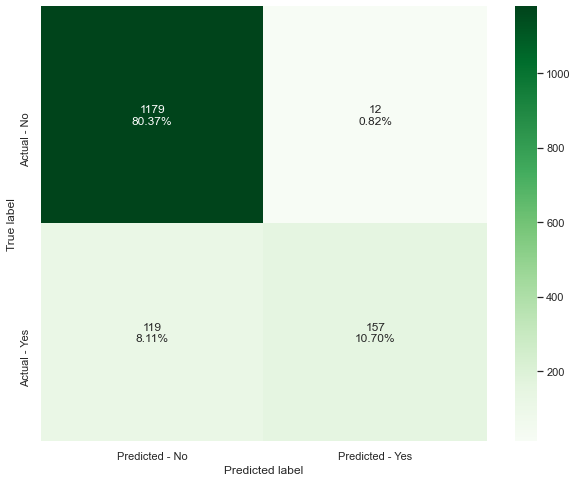

In [346]:
# Confusion matrix
make_confusion_matrix(rfc, X_test, y_test, color='Greens')

- Default Random Forest overfits the training data and is not able to generalize on test data.
- Out of 276 product buyers, it noly identified 162, but with high precision

### ii) Random Forest with weighted classes

In [347]:
rfc_wt = RandomForestClassifier(class_weight={0:0.19,1:0.81}, random_state=1)
rfc_wt.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 0.19, 1: 0.81}, random_state=1)

In [348]:
# Getting the metric scores
rfc_wt_scores = get_metrics_score(rfc_wt, X_train, X_test, y_train, y_test)

Accuracy on training set :  1.0
Accuracy on test set :  0.904
Recall on training set :  1.0
Recall on test set :  0.522
Precision on training set :  1.0
Precision on test set :  0.941
F1 on training set :  1.0
F1 on test set :  0.671


With wighted classes, Random Forest still overfits.

### iii) Random Forest: Hyperparameters tuning

In [350]:
# Choose the type of classifier. 
rf_GS = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {  
        "n_estimators": [50, 80, 90, 110,250],
        "min_samples_leaf": np.arange(1, 6,1),
        "max_features": [0.7,0.9,'log2','auto'],
        "max_samples": [0.7,0.9,None],
}


# Run the grid search
grid_obj = GridSearchCV(rf_GS, parameters, scoring='recall',cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_GS = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_GS.fit(X_train, y_train)

RandomForestClassifier(max_features=0.7, n_estimators=110, random_state=1)

In [351]:
# Getting the metric scores
rf_GS_scores = get_metrics_score(rf_GS, X_train, X_test, y_train, y_test)

Accuracy on training set :  1.0
Accuracy on test set :  0.929
Recall on training set :  1.0
Recall on test set :  0.681
Precision on training set :  1.0
Precision on test set :  0.922
F1 on training set :  1.0
F1 on test set :  0.783


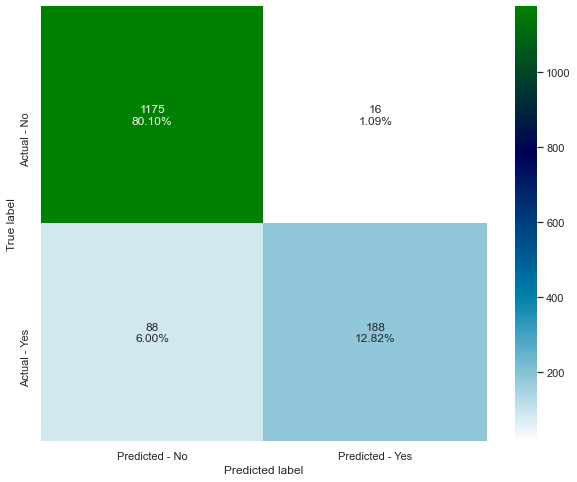

In [454]:
# Confusion matrix
make_confusion_matrix(rf_GS, X_test, y_test, color='ocean_r')

The Random Forest Clasifier obtained with GridSearch is overfitting on training data and is not generalizing on test data. The `recall` on test data did improved slighly as compared to the default classifier and the one with weighted Decision Trees.

## <a name = 'link32'>3.3 Model building  - Boosting</a>

### <a name = 'link331'>3.3.1 Adaptative Boosting (AdaBoost)</a>

### i) Default model with Decision Tree as base model

In [352]:
adb = AdaBoostClassifier(random_state = 1)
adb.fit(X_train, y_train)

AdaBoostClassifier(random_state=1)

In [353]:
# Getting the metric scores
adb_scores = get_metrics_score(adb, X_train, X_test, y_train, y_test)

Accuracy on training set :  0.849
Accuracy on test set :  0.842
Recall on training set :  0.315
Recall on test set :  0.304
Precision on training set :  0.725
Precision on test set :  0.677
F1 on training set :  0.439
F1 on test set :  0.42


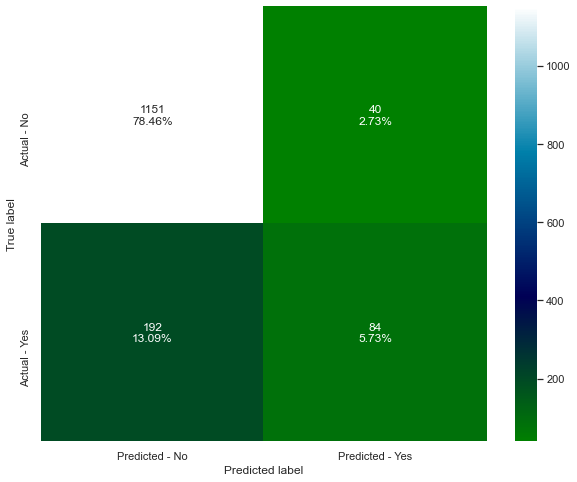

In [354]:
# Confusion matrix
make_confusion_matrix(adb, X_test, y_test, color='ocean')

AdaBoost has the advantage that it is not overfitting. However, it is doing a terrible job. Out of 276 people that took a product in the test data, it only identified 91. The `precision` as well is terrible.

### ii) AdaBoost with weighted Decision Trees

In [355]:
adb_wt = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(class_weight={0:0.19,1:0.81}, random_state = 1), 
                random_state = 1, learning_rate = 1)
adb_wt.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.19,
                                                                       1: 0.81},
                                                         random_state=1),
                   learning_rate=1, random_state=1)

In [356]:
# Getting the metric scores
adb_wt_scores = get_metrics_score(adb_wt, X_train, X_test, y_train, y_test)

Accuracy on training set :  1.0
Accuracy on test set :  0.893
Recall on training set :  1.0
Recall on test set :  0.739
Precision on training set :  1.0
Precision on test set :  0.706
F1 on training set :  1.0
F1 on test set :  0.722


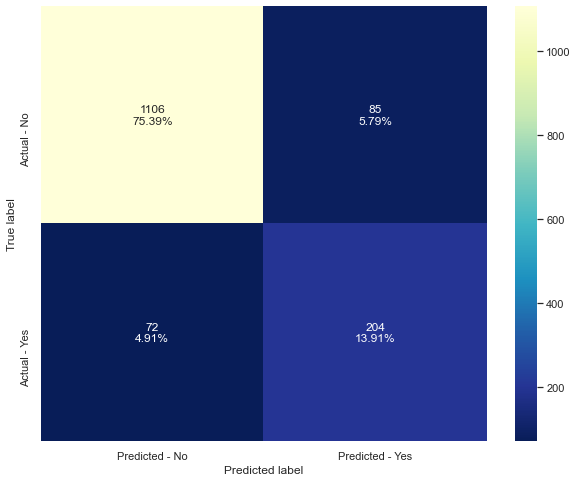

In [459]:
# Confusion matrix
make_confusion_matrix(adb_wt, X_test, y_test, color='YlGnBu_r')

When weighting the Decision Trees, AdaBoost overfits on training data ad does a fairly good work on test data with a `recall` of 74%

### iii) AdaBoost: Hyperparameters tuning

In [358]:
# Choose the type of classifier. 
adb_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),
                      DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(10,251,10),
    "learning_rate":np.arange(0.02,2,0.02)
}

# Type of scoring used to compare parameter  combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(adb_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
adb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
adb_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=1.36, n_estimators=150, random_state=1)

In [359]:
# Getting the metric scores
adb_tuned_scores = get_metrics_score(adb_tuned, X_train, X_test, y_train, y_test)

Accuracy on training set :  1.0
Accuracy on test set :  0.888
Recall on training set :  1.0
Recall on test set :  0.634
Precision on training set :  1.0
Precision on test set :  0.732
F1 on training set :  1.0
F1 on test set :  0.68


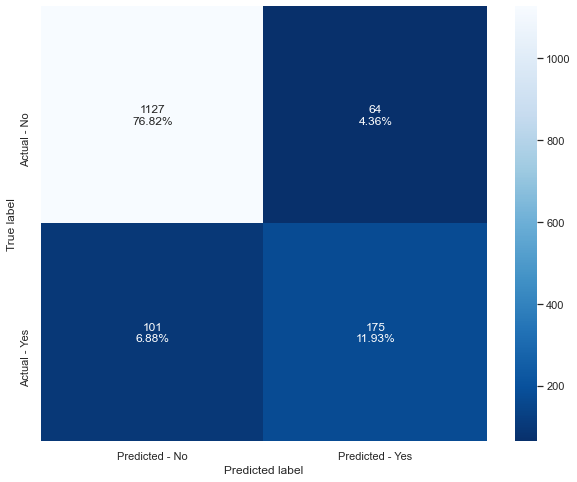

In [360]:
# Confusion matrix
make_confusion_matrix(adb_tuned, X_test, y_test, color='Blues_r')

The model with hyperparameters tuning overfits also on training data, and does less that the model with weighted Decision Trees.

### <a name='link332'>3.3.2 Gradient Boosting Model</a>

### i) Default model fitting

In [361]:
gbm = GradientBoostingClassifier(random_state = 1)
gbm.fit(X_train, y_train)

GradientBoostingClassifier(random_state=1)

In [362]:
# Getting the metric scores
gbm_scores = get_metrics_score(gbm, X_train, X_test, y_train, y_test)

Accuracy on training set :  0.885
Accuracy on test set :  0.872
Recall on training set :  0.441
Recall on test set :  0.402
Precision on training set :  0.899
Precision on test set :  0.828
F1 on training set :  0.592
F1 on test set :  0.541


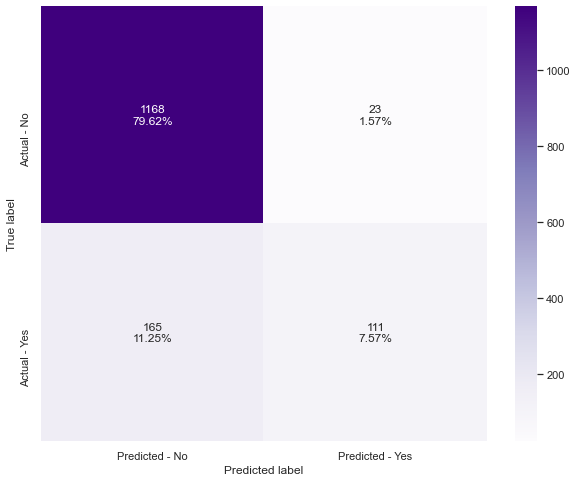

In [363]:
# Confusion matrix
make_confusion_matrix(gbm, X_test, y_test, color='Purples')

Model is not overfitting, but apart from `precision`, perfomances on unseen data are not good.

### ii) Gradient Boosting: Hyperparameters tuning

In [364]:
# Choose the type of classifier. 
gbm_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(gbm_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbm_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbm_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.8, n_estimators=250, random_state=1,
                           subsample=0.9)

In [365]:
# Getting the metric scores
gbm_tuned_scores = get_metrics_score(gbm_tuned, X_train, X_test, y_train, y_test)

Accuracy on training set :  0.925
Accuracy on test set :  0.881
Recall on training set :  0.635
Recall on test set :  0.496
Precision on training set :  0.947
Precision on test set :  0.792
F1 on training set :  0.76
F1 on test set :  0.61


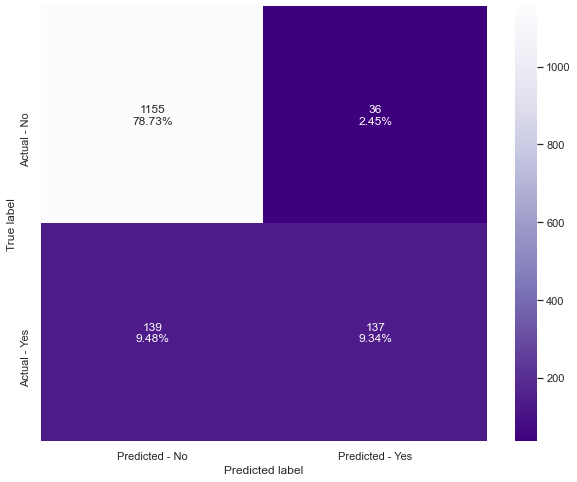

In [366]:
# Confusion matrix
make_confusion_matrix(gbm_tuned, X_test, y_test, color='Purples_r')

### <a name = 'link3.3.3'>3.3.3 eXtreme Gradient Boosting (XGBoost)</a>

### i) Model fitting

In [368]:
xgb = XGBClassifier(random_state=1, eval_metric='logloss')
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [369]:
# Getting the metric scores
xgb_scores = get_metrics_score(xgb, X_train, X_test, y_train, y_test)

Accuracy on training set :  0.999
Accuracy on test set :  0.927
Recall on training set :  0.995
Recall on test set :  0.725
Precision on training set :  1.0
Precision on test set :  0.866
F1 on training set :  0.998
F1 on test set :  0.789


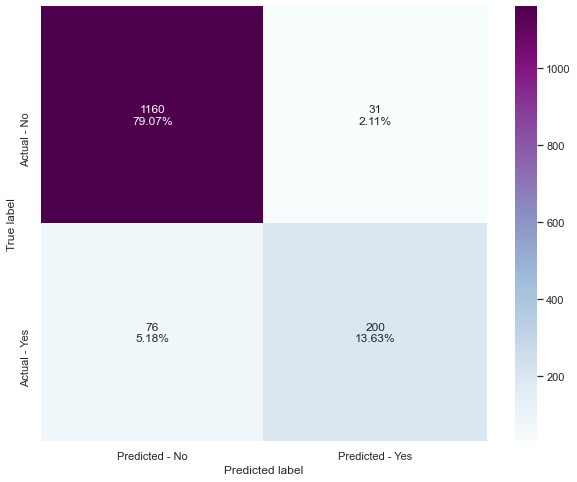

In [370]:
# Confusion matrix
make_confusion_matrix(xgb, X_test, y_test, color='BuPu')

- XGBoost is overfitting on training data.
- Perfomance on test data are just fairly good.

### ii) XGBoost: Hyperparameters tuning

In [371]:
# Choose the type of classifier. 
xgb_h = XGBClassifier(random_state=1, eval_metric='logloss')

# Grid of parameters to choose from
parameters = {
    "n_estimators": [10,30,50,80,100,120,150],
    "scale_pos_weight":[1,2,5],
    "n_jobs":[8,12,16,20],
    "subsample":[0.7,0.9,1],
    "learning_rate":[0.05, 0.1,0.15,0.2],
    "colsample_bytree":[0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_h, parameters,scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_h = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_h.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.5,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=120, n_jobs=8,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=5, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [372]:
# Getting the metric scores
xgb_h_scores = get_metrics_score(xgb_h, X_train, X_test, y_train, y_test)

Accuracy on training set :  0.978
Accuracy on test set :  0.907
Recall on training set :  0.995
Recall on test set :  0.822
Precision on training set :  0.898
Precision on test set :  0.721
F1 on training set :  0.944
F1 on test set :  0.768


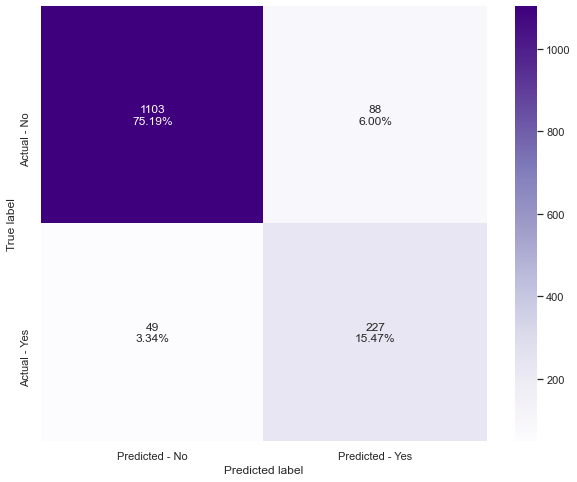

In [463]:
# Confusion matrix
make_confusion_matrix(xgb_h, X_test, y_test, color='Purples')

- Tuning hyperparameters on XGBoost yields better `recall score`, and reduces overfitting.
- 221 product purchasers out of 276 identified with a fairly good `precision`

### <a name = 'link3.3.4'>3.3.4 Stacking Classifier</a>

### i) Stacking with Logistic Regression as final estimator

In [374]:
estimators = [('Bagging', bagging_GS), ('AdaBoost', adb_wt), ('Decision Tree', modelTree3)]

stk_lr = StackingClassifier(estimators=estimators)

stk_lr.fit(X_train,y_train)

StackingClassifier(estimators=[('Bagging',
                                BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.19,
                                                                                                      1: 0.81},
                                                                                        random_state=1),
                                                  max_features=1,
                                                  n_estimators=40,
                                                  random_state=1)),
                               ('AdaBoost',
                                AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.19,
                                                                                                       1: 0.81},
                                                                                         random_state=1),
                                                   le

In [375]:
# Getting the metric scores
xgb_h_scores = get_metrics_score(stk_lr, X_train, X_test, y_train, y_test)

Accuracy on training set :  1.0
Accuracy on test set :  0.914
Recall on training set :  1.0
Recall on test set :  0.62
Precision on training set :  1.0
Precision on test set :  0.891
F1 on training set :  1.0
F1 on test set :  0.731


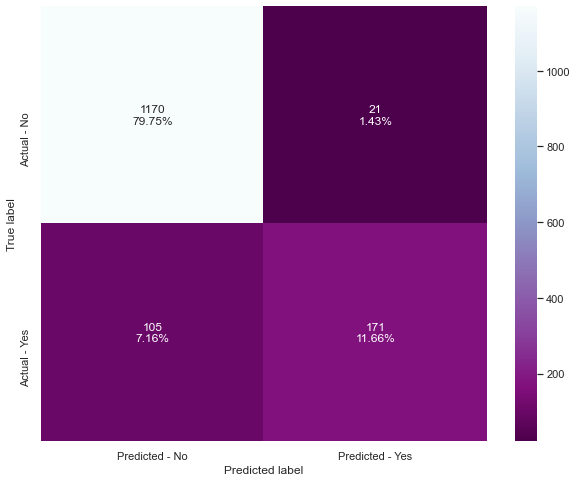

In [376]:
# Confusion matrix
make_confusion_matrix(stk_lr, X_test, y_test, color='BuPu_r', threshold = 0.5)

- Stacking with Logistic regression as final estimator overfits.
- Out of 276 products purchasers, it only identified 170 though with a high `precision`

### ii) Stacking with XGBoost as final estimator

In [377]:
estimators = [('Bagging', bagging_GS), ('AdaBoost', adb_wt), ('Decision Tree', modelTree3)]

final_estimator = xgb_h

stk_xgb = StackingClassifier(estimators=estimators,final_estimator=final_estimator)

stk_xgb.fit(X_train ,y_train)

StackingClassifier(estimators=[('Bagging',
                                BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.19,
                                                                                                      1: 0.81},
                                                                                        random_state=1),
                                                  max_features=1,
                                                  n_estimators=40,
                                                  random_state=1)),
                               ('AdaBoost',
                                AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.19,
                                                                                                       1: 0.81},
                                                                                         random_state=1),
                                                   le

In [378]:
# Getting the metric scores
xgb_h_scores = get_metrics_score(stk_xgb, X_train, X_test, y_train, y_test)

Accuracy on training set :  0.966
Accuracy on test set :  0.866
Recall on training set :  1.0
Recall on test set :  0.87
Precision on training set :  0.845
Precision on test set :  0.599
F1 on training set :  0.916
F1 on test set :  0.709


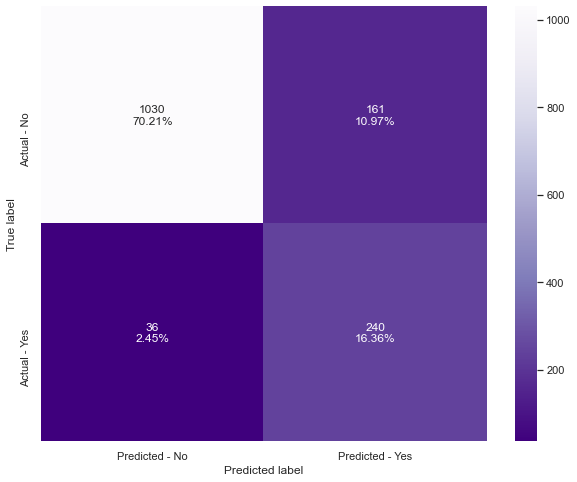

In [466]:
# Confusion matrix
make_confusion_matrix(stk_xgb, X_test, y_test,color='Purples_r')

Stacking classifier with XGBoost as final estimator does a pretty good job in terms of `recall` but too much false positive.

## <a name = 'link34'>3.4 Comparing all models</a>

In [382]:
# defining list of models
models = [modelTree, modelTree1, modelTree2, modelTree3, bagging, bagging_wt, bagging_GS, rfc, rfc_wt, rf_GS,
          adb, adb_wt, adb_tuned, gbm, gbm_tuned, xgb ,xgb_h, stk_lr, stk_xgb]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = [] 
f1_test = []

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:
    
    scores = get_metrics_score2(model,X_train, X_test, y_train, y_test)
    acc_train.append(scores[0])
    acc_test.append(scores[1])
    recall_train.append(scores[2])
    recall_test.append(scores[3])
    precision_train.append(scores[4])
    precision_test.append(scores[5])
    f1_train.append(scores[6])
    f1_test.append(scores[7])

In [383]:
comparison_frame = pd.DataFrame({'Model':['Decision Tree','Pre-pruned Decision Tree', 'DecisionTree: GridSearch', 
                                          'Decision Tree: Cost-complexity', 'Random Forest',
                                          'Random Forest: Weighted trees', 'Random Forest: GridSearch', 
                                          'Bagging Classifier','Bagging with weighted trees',
                                          'Bagging: GridSearch','AdaBoost',
                                          'AdaBoost with weigted trees', 'AdaBoost: GridSearch',
                                          'Gradient Boosting', 'Gradient Boosting: GridSearch',
                                          'XGBoost Classifier', 'XGBoost: GridSearch', 
                                          'Stacking: Logistic Regression', 'Stacking: XGboost'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test,
                                           'Train_F1-Score':f1_train, 'Test_F1-Score':f1_test}) 

#Sorting models in decreasing order of test recall
comparison_frame.sort_values(by='Test_Recall',ascending=False)

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1-Score,Test_F1-Score
18,Stacking: XGboost,0.96551,0.86571,1.00000,0.86957,0.84514,0.59850,0.91607,0.70901
16,XGBoost: GridSearch,0.97778,0.90661,0.99534,0.82246,0.89776,0.72063,0.94404,0.76819
6,Random Forest: GridSearch,0.67524,0.65303,0.71894,0.76087,0.33238,0.32159,0.45459,0.45210
11,AdaBoost with weigted trees,1.00000,0.89298,1.00000,0.73913,1.00000,0.70588,1.00000,0.72212
0,Decision Tree,1.00000,0.90320,1.00000,0.73913,1.00000,0.74453,1.00000,0.74182
3,Decision Tree: Cost-complexity,1.00000,0.90320,1.00000,0.73913,1.00000,0.74453,1.00000,0.74182
15,XGBoost Classifier,0.99912,0.92706,0.99534,0.72464,1.00000,0.86580,0.99767,0.78895
9,Bagging: GridSearch,1.00000,0.92911,1.00000,0.68116,1.00000,0.92157,1.00000,0.78333
12,AdaBoost: GridSearch,1.00000,0.88753,1.00000,0.63406,1.00000,0.73222,1.00000,0.67961
4,Random Forest,0.99386,0.91138,0.96894,0.61957,0.99840,0.87245,0.98345,0.72458


- Stacking with XGBoost as final estimator performed well on training and test data. In terms of `recall`, it had the highest score.
- Tuned XGBoost as well did a good job with a better `precision` than the previous model.
- Both the above mentioned models can be generalized for they did not overfit too much.
- Hyperparameters tuned Decision Tree, AdaBoost and Pre-pruned Decision Tree as the poorest models with `recall` less than 40%.

## Let's see which features mostly help in the predictions

### XGBoost-GridSearch feature importances

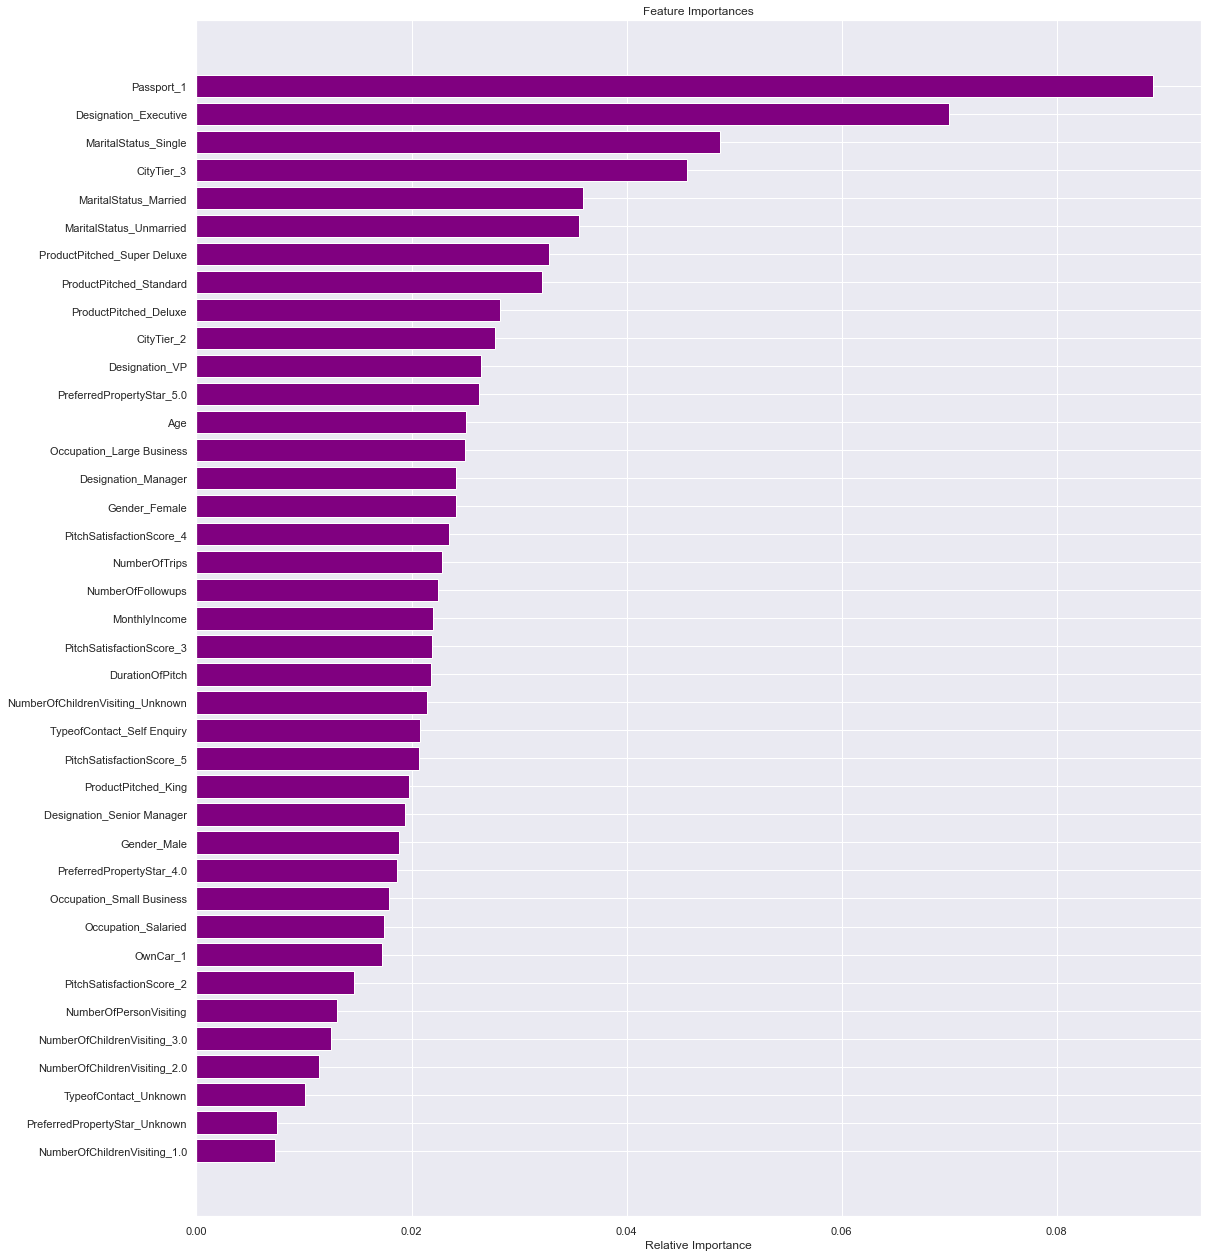

In [391]:
importances = xgb_h.feature_importances_
indices = np.argsort(importances)
feature_names = list(X_train.columns)

plt.figure(figsize=(18,22))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='purple', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Random Forest - GridSearch feature importances

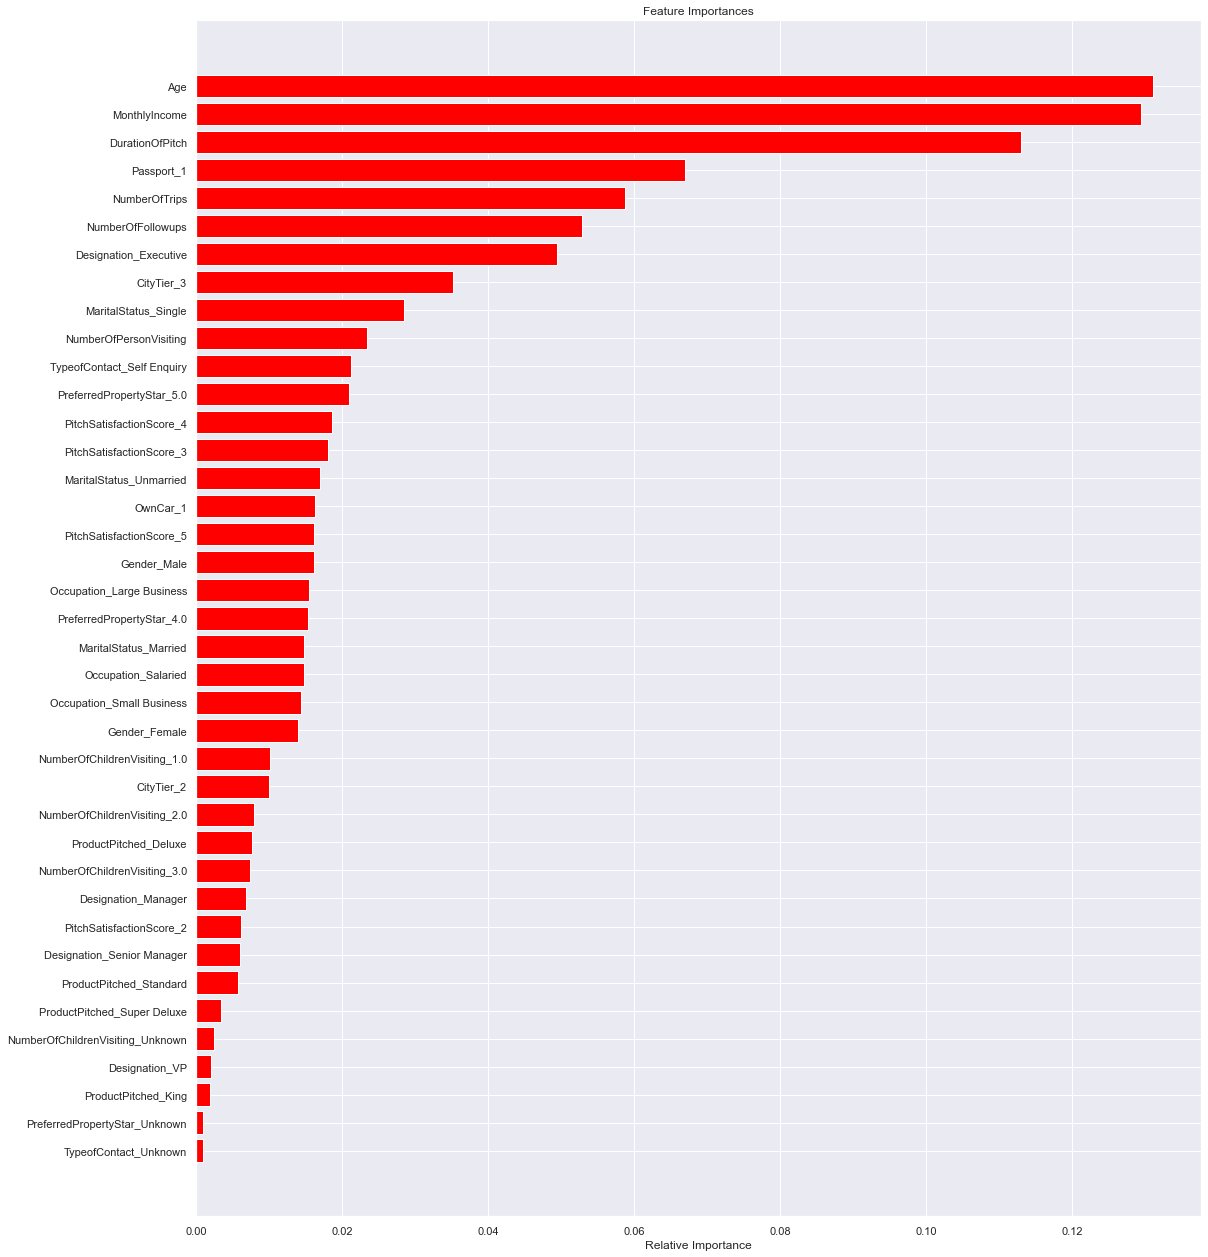

In [390]:
importances = rf_GS.feature_importances_
indices = np.argsort(importances)
feature_names = list(X_train.columns)

plt.figure(figsize=(18,22))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### AdaBoost with weighted Trees feature importances

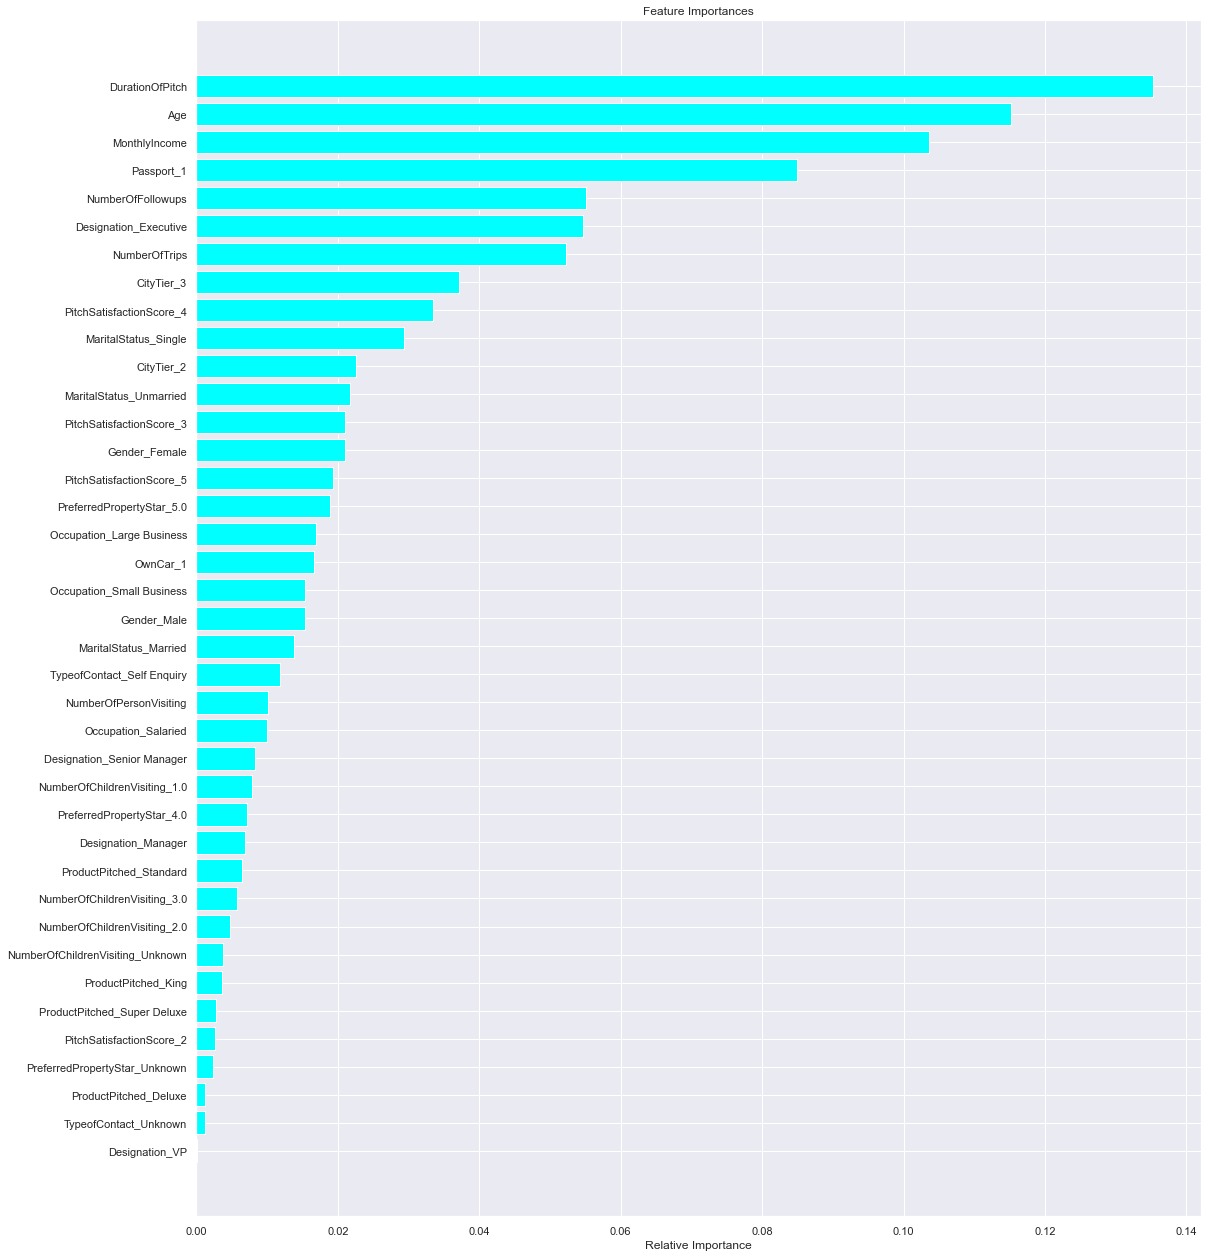

In [389]:
importances = adb_wt.feature_importances_
indices = np.argsort(importances)
feature_names = list(X_train.columns)

plt.figure(figsize=(18,22))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='cyan', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Cost-Complexity Decision Tree feature imprtances

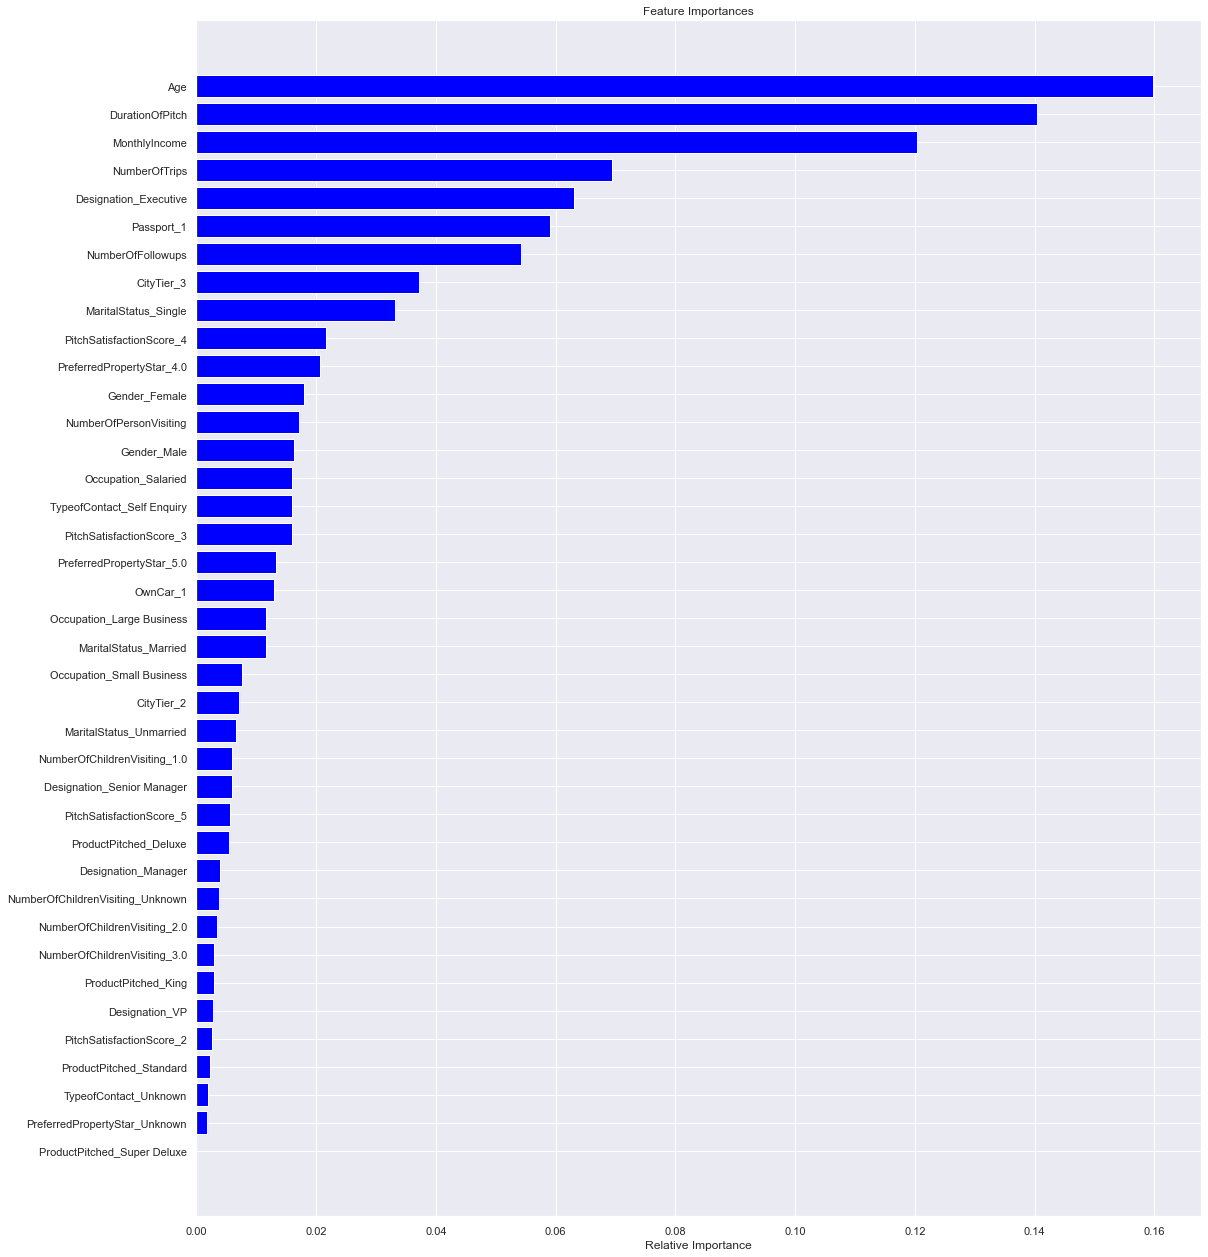

In [388]:
importances = modelTree3.feature_importances_
indices = np.argsort(importances)
feature_names = list(X_train.columns)

plt.figure(figsize=(18,22))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

From the above plots, we can notice the following:
- Contrary to AdaBoost, Random Forest and Decision Tree, XGboost did not report preponderant features. In fact the most contributing fearture according to XGBoost, `Passport_1`, contributed for less than 8% in th prediction. On the contrary, for the other well-perfoming models, the most contributing features had at least 12% of contribution.
- Each feature contriuted for at least 1% in XGBoost, where for AdaBoost, Random Forest and Decision Tree almost half of the features contributed for less than 1%.
- Importance of variables is different for the different models. Random Forest, Decision Tree and AdaBoost used almost the same first  five feartures even if with different importance in terms of order and of contribution. In the contrary, XGBoost used a completely different set of features.

# <a name = 'link4'>Conclusion</a>

- We have built ensemble learning models to predict which customers of the tourism company 'Visit with Us' are more likely to purchase the newly introduced product based on the availabe data.
- Of all the 19 models we built, the five most perfomorming on the `recall score`, metric more appropriate to evaluate the models, were: `Stacking wth XGBoost as final estimator`, `XGBoost with tuned hyperparameters`, `Random Forest with tuned hyperparameters`, `AdaBoost wit weighted trees` and `Decision tree`.
- According to the `XGBoost with tuned hyperparameters`, the most important vavriables for predicting product purchasers are: `Passport`, `Designation`, `MaritalStatus`, `CityTier` and `ProductPitched`. Passport owners the more buy products; Executives as well; single people;  people living in the less developped cities. Deluxe products were the more likely to be purchased.
- According to the other above mentioned models, factors that influence product purchasing are: `Age`, `MonthlyIncome`, `DurationOfPitch`, `NumberOfFollowups` and `Passport`.Younger people are more likely to buy a tourism product. Product purchasers are mostly among lower income. Customers pitched for a longer period of time are more likely to purchase a product. The more followed up the customer, the more likely he is tio purchase a product.